In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

ACB    MWG    MSN    BID    VRE    POW    PLX    HPG    VNM  \
2020-01-02  9460  37730  46160  32369  34350  11352  48590  10930  82450   
2020-01-03  9460  37170  46570  32229  34600  11161  49100  11000  82720   
2020-01-06  9260  36990  45830  31610  33650  10827  49280  10930  82090   
2020-01-07  9260  37270  46000  32229  33950  10731  48590  10790  82860   
2020-01-08  9090  36370  45350  32509  32700  10254  47910  10680  83060   

              VHM  ...      GVR     SAB      BCM   MBB    GAS  SSB     SHB  \
2020-01-02  62600  ...  10150.0  100180  28160.0  9680  68440  NaN  2990.0   
2020-01-03  62820  ...  10500.0  100440  27880.0  9700  68590  NaN  2900.0   
2020-01-06  61500  ...  10320.0  100080  27590.0  9560  70760  NaN  2860.0   
2020-01-07  61790  ...  10050.0  100180  26830.0  9580  70250  NaN  2860.0   
2020-01-08  60830  ...   9700.0   99810  26640.0  9450  70180  NaN  2860.0   

             SSI    STB   VPB  
2020-01-02  8740  10200  7250  
2020-01-03  8670  10200  7200  
2020-01-06  8640  10050  7030  
2020-01-07  8670  10150  7180  
2020-01-08  8430   9980  7090  

[5 rows x 30 columns]

In [3]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

minPar = (0,0,0)
minParS = (0,0,0,0)
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.ACB,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if minAIC > results.aic:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC

        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12684D+01    |proj g|=  3.83693D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.837D-08   1.127D+01
  F =   11.268395594589705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07918D+01    |proj g|=  2.30304D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     13      1     0     0   3.685D-05   1.079D+01
  F =   10.791752344296242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35191D+00    |proj g|=  1.09914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.677D-05   8.251D+00
  F =   8.2507515276246561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34992D+00    |proj g|=  1.40357D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.403D-03   8.350D+00
  F =   8.3499223485385095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33691D+00    |proj g|=  3.47593D-01

At iterate    5    f=  8.33585D+00    |proj g|=  5.48649D-01

At iterate   10    f=  8.33372D+00    |proj g|=  7.63001D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24825D+00    |proj g|=  1.76911D-02

At iterate    5    f=  8.24235D+00    |proj g|=  1.70038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     11      1     0     0   1.700D-05   8.242D+00
  F =   8.2423478478795964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.06761D+01    |proj g|=  5.04364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     24      1     0     0   2.244D-04   1.068D+01
  F =   10.676097603285399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06111D+00    |proj g|=  5.21047D-01

At iterate    5    f=  8.01884D+00    |proj g|=  4.50449D-04

At iterate   10    f=  8.01880D+00    |proj g|=  1.03056D-02

At iterate   15    f=  8.01326D+00    |proj g|=  1.46569D-01

At iterate   20    f=  7.93520D+00    |proj g|=  1.89833D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     25      1     0     0   1.315D-06   7.935D+00
  F =   7.9350819197361817     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95841D+00    |proj g|=  5.79199D-01

At iterate    5    f=  7.91507D+00    |proj g|=  4.09293D-03

At iterate   10    f=  7.91497D+00    |proj g|=  1.11733D-02

At iterate   15    f=  7.90507D+00    |proj g|=  1.42191D-01

At iterate   20    f=  7.82709D+00    |proj g|=  1.46899D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   9.217D-06   7.824D+00
  F =   7.8242312342147171     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.06550D+01    |proj g|=  5.14541D-05

At iterate   10    f=  1.06548D+01    |proj g|=  1.70306D-03

At iterate   15    f=  1.05922D+01    |proj g|=  8.54238D-01

At iterate   20    f=  1.05309D+01    |proj g|=  1.15765D-01

At iterate   25    f=  8.86402D+00    |proj g|=  4.05520D+00

At iterate   30    f=  7.96758D+00    |proj g|=  4.94371D-01

At iterate   35    f=  7.94631D+00    |proj g|=  7.90347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     61      1     0     0   8.260D-05   7.946D+00
  F =   7.9463111579535681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.06339D+01    |proj g|=  1.44461D-04

At iterate   10    f=  1.06339D+01    |proj g|=  2.45160D-04

At iterate   15    f=  1.06337D+01    |proj g|=  9.86797D-04

At iterate   20    f=  1.06288D+01    |proj g|=  3.65611D-02

At iterate   25    f=  1.04930D+01    |proj g|=  7.06647D-01

At iterate   30    f=  8.96798D+00    |proj g|=  1.90161D+00

At iterate   35    f=  8.40429D+00    |proj g|=  2.24226D+00

At iterate   40    f=  8.13866D+00    |proj g|=  1.75676D+00

At iterate   45    f=  8.01957D+00    |proj g|=  2.50060D-01

At iterate   50    f=  7.96895D+00    |proj g|=  5.76246D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.92834D+00    |proj g|=  6.60469D-03

At iterate   10    f=  7.92788D+00    |proj g|=  2.45715D-02

At iterate   15    f=  7.89243D+00    |proj g|=  2.73072D-01

At iterate   20    f=  7.83501D+00    |proj g|=  3.79797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   5.367D-07   7.835D+00
  F =   7.8350022006161275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95981D+00    |proj g|=  6.08604D-01

At iterate    5    f=  7.91308D+00    |proj g|=  5.38806D-03

At iterate   10    f=  7.91156D+00    |proj g|=  8.75529D-03

At iterate   15    f=  7.91153D+00    |proj g|=  1.64450D-03

At iterate   20    f=  7.91085D+00    |proj g|=  2.23951D-02

At iterate   25    f=  7.84872D+00    |proj g|=  2.61024D-01

At iterate   30    f=  7.81852D+00    |proj g|=  7.75930D-02

At iterate   35    f=  7.81758D+00    |proj g|=  7.88194D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19398D+00    |proj g|=  5.56642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      7      1     0     0   4.978D-05   7.194D+00
  F =   7.1939685290366597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.5

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17773D+00    |proj g|=  2.14146D-01

At iterate    5    f=  7.14555D+00    |proj g|=  6.86218D-04

At iterate   10    f=  7.14555D+00    |proj g|=  5.90805D-03

At iterate   15    f=  7.14506D+00    |proj g|=  6.63120D-02

At iterate   20    f=  7.13367D+00    |proj g|=  1.57273D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     30      1     0     0   8.255D-06   7.130D+00
  F =   7.1302277897173925     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19436D+00    |proj g|=  1.29322D-02

At iterate    5    f=  7.19393D+00    |proj g|=  1.74323D-04

At iterate   10    f=  7.19393D+00    |proj g|=  3.55936D-04

At iterate   15    f=  7.19392D+00    |proj g|=  2.04016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   1.333D-05   7.194D+00
  F =   7.1939209949054295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19649D+00    |proj g|=  1.95192D-01


 This problem is unconstrained.



At iterate    5    f=  7.14363D+00    |proj g|=  1.10145D-02

At iterate   10    f=  7.14361D+00    |proj g|=  3.44914D-03

At iterate   15    f=  7.14334D+00    |proj g|=  4.87284D-02

At iterate   20    f=  7.13602D+00    |proj g|=  1.46230D-01

At iterate   25    f=  7.12993D+00    |proj g|=  8.43251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   2.158D-06   7.130D+00
  F =   7.1299341242965442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18736D+00    |proj g|=  5.60004D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   1.942D-05   7.187D+00
  F =   7.1873402564241768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53887D+00    |proj g|=  8.66275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   2.803D-06   7.539D+00
  F =   7.5388709979202888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23633D+00    |proj g|=  1.29144D-01


 This problem is unconstrained.



At iterate    5    f=  7.21997D+00    |proj g|=  1.38448D-03

At iterate   10    f=  7.21990D+00    |proj g|=  6.07352D-03

At iterate   15    f=  7.21189D+00    |proj g|=  8.73136D-02

At iterate   20    f=  7.12351D+00    |proj g|=  3.62797D-02

At iterate   25    f=  7.12297D+00    |proj g|=  6.15126D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     32      1     0     0   6.151D-06   7.123D+00
  F =   7.1229702682155178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   1.425D-05   7.201D+00
  F =   7.2006362475281565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18773D+00    |proj g|=  1.29757D-02

At iterate    5    f=  7.18763D+00    |proj g|=  5.64162D-03

At iterate   10    f=  7.18731D+00    |proj g|=  8.43325D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  7.32635D+00    |proj g|=  3.33724D-02

At iterate   15    f=  7.30410D+00    |proj g|=  5.15954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.274D-06   7.303D+00
  F =   7.3028062401099252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24811D+00    |proj g|=  1.18697D-01


 This problem is unconstrained.



At iterate    5    f=  7.21991D+00    |proj g|=  1.72418D-02

At iterate   10    f=  7.21979D+00    |proj g|=  3.00147D-03

At iterate   15    f=  7.21635D+00    |proj g|=  5.51928D-02

At iterate   20    f=  7.12865D+00    |proj g|=  2.46273D-02

At iterate   25    f=  7.12267D+00    |proj g|=  3.48858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     36      1     0     0   4.184D-06   7.123D+00
  F =   7.1226677810580350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28101D+00    |proj g|=  1.46067D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.461D-02   7.281D+00
  F =   7.2810079851165561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52840D+00    |proj g|=  2.61156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   2.608D-05   7.528D+00
  F =   7.5283981482038316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3

 This problem is unconstrained.



At iterate    5    f=  7.22788D+00    |proj g|=  7.61480D-02

At iterate   10    f=  7.22386D+00    |proj g|=  1.53636D-03

At iterate   15    f=  7.22385D+00    |proj g|=  1.13546D-02

At iterate   20    f=  7.22342D+00    |proj g|=  1.21467D-01

At iterate   25    f=  7.21528D+00    |proj g|=  1.52603D-01

At iterate   30    f=  7.14104D+00    |proj g|=  7.10368D-01

At iterate   35    f=  7.13821D+00    |proj g|=  8.15411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     52      1     0     0   2.276D-05   7.138D+00
  F =   7.1382120974348462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  7.72924D+00    |proj g|=  1.02484D+00

At iterate    5    f=  7.36529D+00    |proj g|=  4.05457D+00

At iterate   10    f=  7.19984D+00    |proj g|=  1.91595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   2.341D-05   7.200D+00
  F =   7.1998429118850158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56906D+00    |proj g|=  8.64138D-01


 This problem is unconstrained.



At iterate    5    f=  7.33001D+00    |proj g|=  2.35010D+00

At iterate   10    f=  7.20454D+00    |proj g|=  7.32261D-02

At iterate   15    f=  7.20443D+00    |proj g|=  7.03682D-01

At iterate   20    f=  7.20023D+00    |proj g|=  1.07441D+00

At iterate   25    f=  7.19974D+00    |proj g|=  2.34403D-02

At iterate   30    f=  7.19974D+00    |proj g|=  7.82897D-02

At iterate   35    f=  7.19973D+00    |proj g|=  2.24825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     49      1     0     0   2.248D-05   7.200D+00
  F =   7.1997335886870344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38222D+00    |proj g|=  3.66628D-01

At iterate    5    f=  7.30926D+00    |proj g|=  5.23863D-04

At iterate   10    f=  7.30911D+00    |proj g|=  1.59716D-02

At iterate   15    f=  7.30097D+00    |proj g|=  2.41301D-01

At iterate   20    f=  7.28812D+00    |proj g|=  3.49813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   8.415D-07   7.288D+00
  F =   7.2881246400179807     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.25186D+00    |proj g|=  4.66108D-01

At iterate   10    f=  7.22412D+00    |proj g|=  1.83651D-01

At iterate   15    f=  7.22383D+00    |proj g|=  1.06350D-03

At iterate   20    f=  7.22382D+00    |proj g|=  3.09047D-02

At iterate   25    f=  7.22187D+00    |proj g|=  3.85698D-01

At iterate   30    f=  7.17076D+00    |proj g|=  1.04122D+00

At iterate   35    f=  7.14436D+00    |proj g|=  1.01740D+00

At iterate   40    f=  7.13821D+00    |proj g|=  2.10686D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     50      1     0     0   8.925D-05   7.138D+00
  F =   7.13821030268

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27439D+00    |proj g|=  2.98151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      3      1     0     0   1.147D-05   7.274D+00
  F =   7.2743851851965120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   2.931D-06   7.520D+00
  F =   7.5196894747820195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37628D+00    |proj g|=  3.73423D-01

At iterate    5    f=  7.21696D+00    |proj g|=  3.96246D-02

At iterate   10    f=  7.21634D+00    |proj g|=  1.10890D-03

At iterate   15    f=  7.21630D+00    |proj g|=  6.57905D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     60      1     0     0   2.365D-04   7.131D+00
  F =   7.1313491485262022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72788D+00    |proj g|=  1.02227D+00

At iterate    5    f=  7.58077D+00    |proj g|=  1.19106D+00

At iterate   10    f=  7.22849D+00    |proj g|=  2.54359D-01

At iterate   15    f=  7.22098D+00    |proj g|=  2.86502D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.32147D+00    |proj g|=  2.29320D+00

At iterate   10    f=  7.19908D+00    |proj g|=  3.23453D-01

At iterate   15    f=  7.19814D+00    |proj g|=  4.19022D-01

At iterate   20    f=  7.19734D+00    |proj g|=  1.00223D-01

At iterate   25    f=  7.19441D+00    |proj g|=  7.06291D-01

At iterate   30    f=  7.19309D+00    |proj g|=  1.43256D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     47      1     0     0   1.581D-03   7.193D+00
  F =   7.1930842726620128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.30908D+00    |proj g|=  5.22734D-04

At iterate   10    f=  7.30815D+00    |proj g|=  3.59832D-02

At iterate   15    f=  7.28929D+00    |proj g|=  4.21858D-02

At iterate   20    f=  7.28807D+00    |proj g|=  1.47143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   8.353D-07   7.288D+00
  F =   7.2880699462389256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.22199D+00    |proj g|=  8.21438D-02

At iterate   10    f=  7.21696D+00    |proj g|=  6.36483D-02

At iterate   15    f=  7.21633D+00    |proj g|=  2.57859D-03

At iterate   20    f=  7.21621D+00    |proj g|=  4.58594D-02

At iterate   25    f=  7.19654D+00    |proj g|=  5.97013D-01

At iterate   30    f=  7.13248D+00    |proj g|=  3.20553D-01

At iterate   35    f=  7.13134D+00    |proj g|=  2.11611D-03

At iterate   40    f=  7.13134D+00    |proj g|=  8.52841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     60      1     0     0   2.356D-05   7.131D+00
  F =   7.13133909526

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54592D+00    |proj g|=  4.92433D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.924D-06   7.546D+00
  F =   7.5459197168433461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.22669D+00    |proj g|=  1.66589D-03

At iterate   10    f=  7.22660D+00    |proj g|=  7.37572D-03

At iterate   15    f=  7.21613D+00    |proj g|=  1.00693D-01

At iterate   20    f=  7.13079D+00    |proj g|=  2.30046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   5.844D-06   7.130D+00
  F =   7.1301846732913257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19438D+00    |proj g|=  1.30404D-02

At iterate    5    f=  7.19426D+00    |proj g|=  6.78359D-03

At iterate   10    f=  7.19394D+00    |proj g|=  1.01969D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.811D-05   7.194D+00
  F =   7.1939368162587503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  7.31901D+00    |proj g|=  3.46868D-02

At iterate   15    f=  7.29990D+00    |proj g|=  7.71694D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   5.199D-07   7.296D+00
  F =   7.2959713203259673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25503D+00    |proj g|=  1.18969D-01


 This problem is unconstrained.



At iterate    5    f=  7.22658D+00    |proj g|=  1.17235D-02

At iterate   10    f=  7.22654D+00    |proj g|=  6.51652D-03

At iterate   15    f=  7.22528D+00    |proj g|=  4.83124D-02

At iterate   20    f=  7.14737D+00    |proj g|=  1.54189D-01

At iterate   25    f=  7.12989D+00    |proj g|=  9.74886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   8.695D-06   7.130D+00
  F =   7.1298915660947566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.29192D+00    |proj g|=  1.30860D-01

At iterate    5    f=  7.26876D+00    |proj g|=  2.79192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     18      1     0     0   5.999D-06   7.268D+00
  F =   7.2683720005670223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   10    f=  7.53891D+00    |proj g|=  9.28978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   1.608D-05   7.539D+00
  F =   7.5389098897316824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23655D+00    |proj g|=  1.28670D-01

At iterate    5    f=  7.22022D+00    |proj g|=  3.57202D-03

At iterate   10    f=  7.22020D+00    |proj g|=  6.14873D-03

At iterate   15    f=  7.21885D+00    |proj g|=  6.13916D-02

At iterate   20    f=  7.21593D+00    |proj g|=  1.10857D-02

At iterate   25    f=  7.21570D+00    |proj g|=  1.44491D-02

At iterate   30    f=  7.20331D+00    |proj g|=  1.26432D-01

At iterate   35    f=  7.14215D+00    |proj g|=  4.86094D-01

At iterate   40    f=  7.12353D+00    |proj g|=  2.20840D-02

At iterate   45    f=  7.12256D+00    |proj g|=  1.08994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19567D+00    |proj g|=  1.30436D-01

At iterate    5    f=  7.99617D+00    |proj g|=  6.20230D-01

At iterate   10    f=  7.22964D+00    |proj g|=  2.48199D-01

At iterate   15    f=  7.19666D+00    |proj g|=  5.76161D-02

At iterate   20    f=  7.19312D+00    |proj g|=  3.79220D-01

At iterate   25    f=  7.19259D+00    |proj g|=  1.86160D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     55      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  7.59523D+00    |proj g|=  7.15425D-01
  ys=-1.631E+00  -gs= 8.457E-01 BFGS update SKIPPED

At iterate   10    f=  7.19257D+00    |proj g|=  1.57387D-01

At iterate   15    f=  7.18879D+00    |proj g|=  7.46224D-02

At iterate   20    f=  7.18849D+00    |proj g|=  4.31685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     49      1     1     0   2.194D-04   7.188D+00
  F =   7.1884921394847821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0   

 This problem is unconstrained.



At iterate   10    f=  7.31963D+00    |proj g|=  5.42608D-03
  ys=-6.879E-03  -gs= 8.952E-04 BFGS update SKIPPED

At iterate   15    f=  7.31398D+00    |proj g|=  2.26089D-01

At iterate   20    f=  7.30898D+00    |proj g|=  1.37344D-02

At iterate   25    f=  7.30797D+00    |proj g|=  6.30926D-02

At iterate   30    f=  7.29427D+00    |proj g|=  2.08749D-02

At iterate   35    f=  7.28519D+00    |proj g|=  1.02005D-01

At iterate   40    f=  7.28289D+00    |proj g|=  1.47779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     91      1     1     0   9.934D-05   7.283D+00
  F =   7.2828870565275547     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24826D+00    |proj g|=  1.18972D-01

At iterate    5    f=  7.22031D+00    |proj g|=  4.43999D-02

At iterate   10    f=  7.22003D+00    |proj g|=  1.01323D-03

At iterate   15    f=  7.21913D+00    |proj g|=  2.34400D-02

At iterate   20    f=  7.21486D+00    |proj g|=  1.37145D-02

At iterate   25    f=  7.21468D+00    |proj g|=  2.45939D-03

At iterate   30    f=  7.20864D+00    |proj g|=  6.37647D-02

At iterate   35    f=  7.15759D+00    |proj g|=  1.42803D-01

At iterate   40    f=  7.12327D+00    |proj g|=  6.26085D-02

At iterate   45    f=  7.12279D+00    |proj g|=  4.08522D-03

At iterate   50    f=  7.12251D+00    |proj g|=  3.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [4]:
def one_day(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()

    print(results.summary().tables[1])
    return results

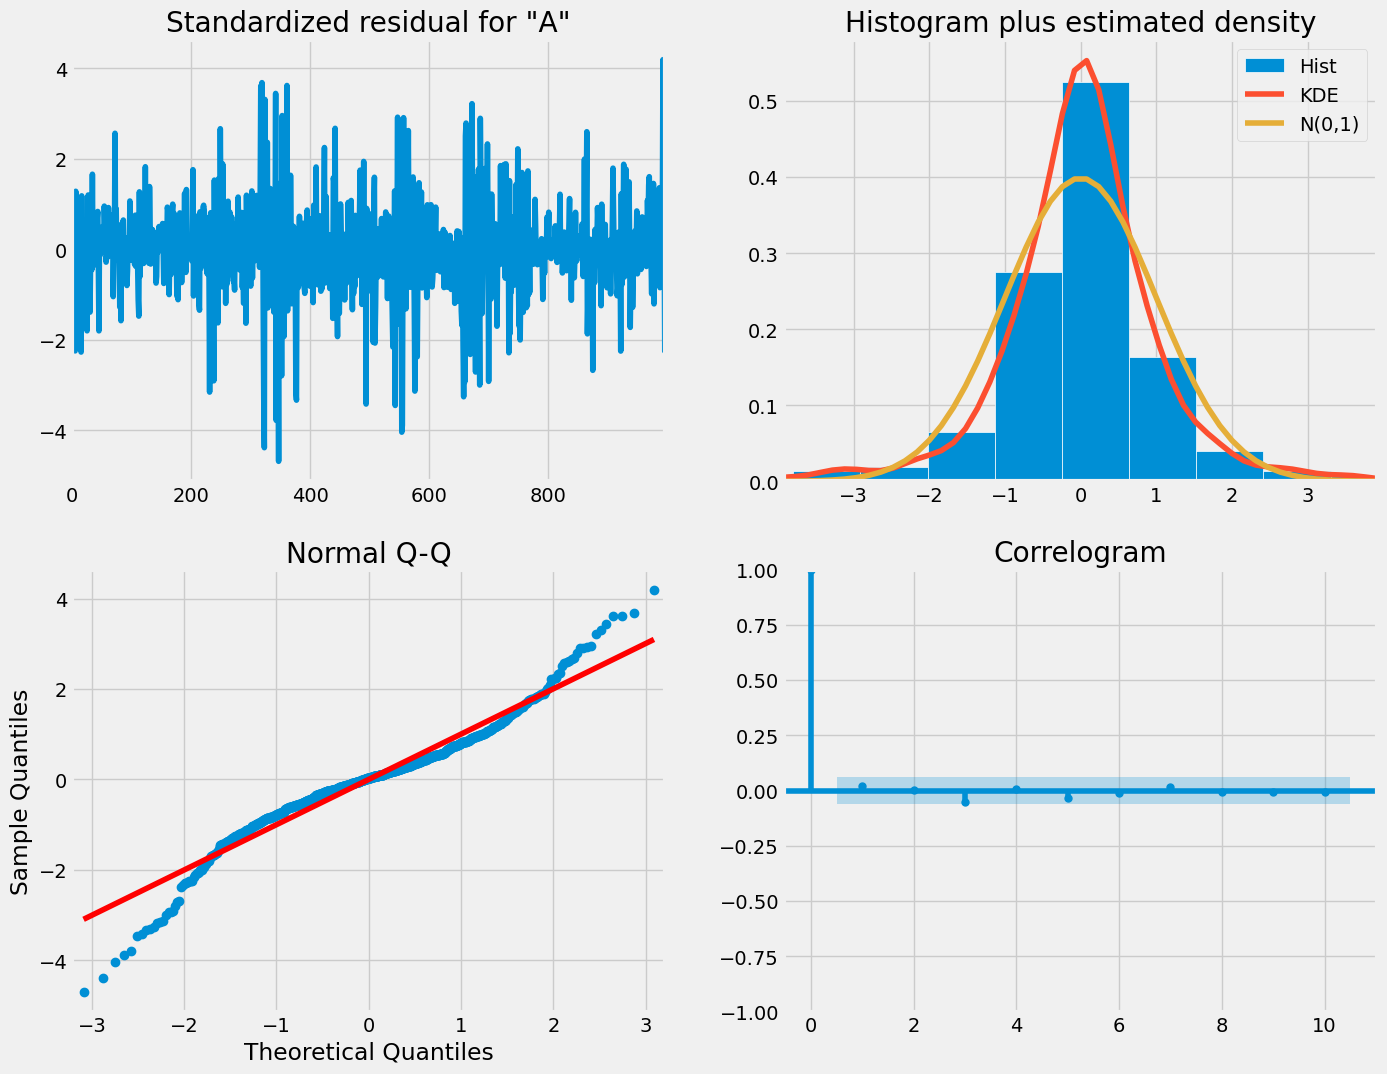

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [74]:
def plot(results):
    fig, axs = plt.subplots(2, 1, figsize=(16, 7))
    
    pred = results.get_prediction(start='2024-01-02', dynamic=False)
    pred_ci = pred.conf_int()
    #
    pred_uc = results.get_forecast(steps=14)
    pred_uci = pred_uc.conf_int()
    #plot

    df['ACB'].plot(ax = axs[0], label='observed')
    pred_uc.predicted_mean.plot(ax=axs[0], label='Forecast')
    
    axs[0].fill_between(pred_uci.index,
                    pred_uci.iloc[:, 0],
                    pred_uci.iloc[:, 1], color='k', alpha=.25)
    
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Prices')
    plt.show()
    

In [18]:
results = one_day('ACB')

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24826D+00    |proj g|=  1.18972D-01

At iterate    5    f=  7.22031D+00    |proj g|=  4.43999D-02

At iterate   10    f=  7.22003D+00    |proj g|=  1.01323D-03

At iterate   15    f=  7.21913D+00    |proj g|=  2.34400D-02

At iterate   20    f=  7.21486D+00    |proj g|=  1.37145D-02

At iterate   25    f=  7.21468D+00    |proj g|=  2.45939D-03

At iterate   30    f=  7.20864D+00    |proj g|=  6.37647D-02

At iterate   35    f=  7.15759D+00    |proj g|=  1.42803D-01

At iterate   40    f=  7.12327D+00    |proj g|=  6.26085D-02

At iterate   45    f=  7.12279D+00    |proj g|=  4.08522D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.12251D+00    |proj g|=  3.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   3.448D-02   7.123D+00
  F =   7.1225082733096921     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8871      0.124      7.151      0.000       0.644       1.130
ma.L1         -0.9017      0.117     -7.680      0.000      -1.132      -0.672
ar.S.L12      -0.0270      0.031     -0.868  

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


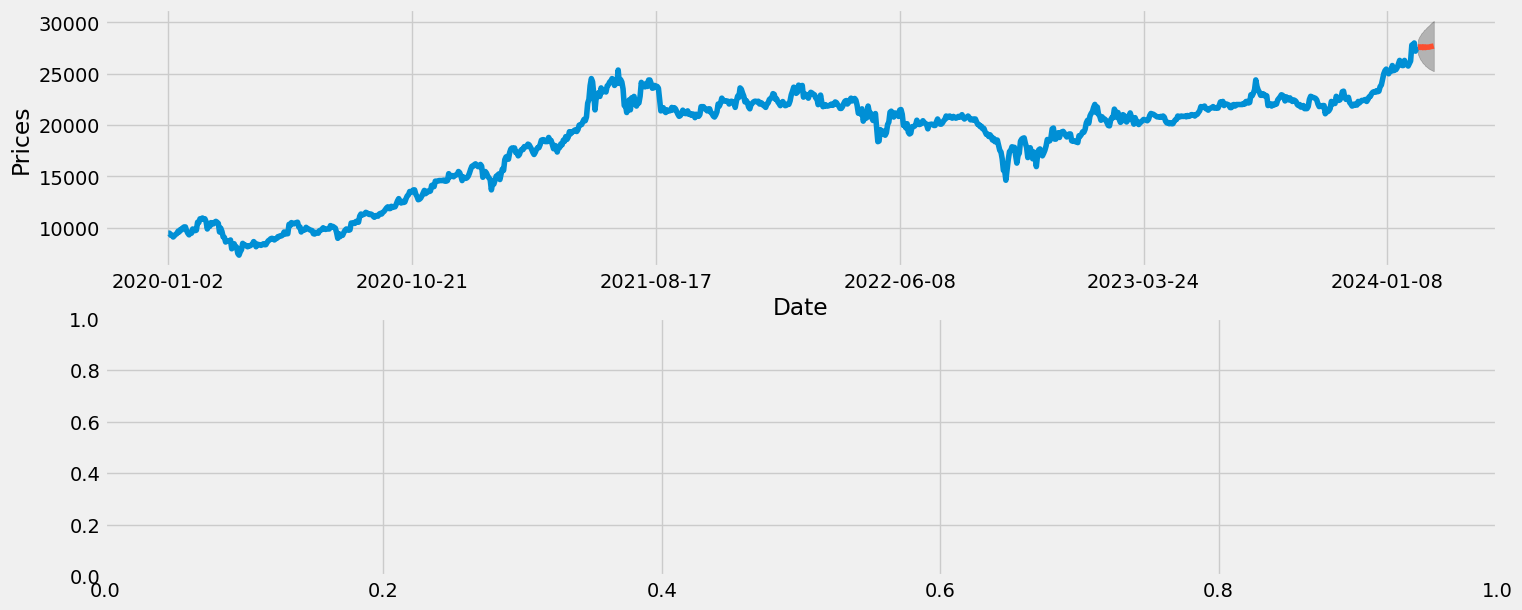

In [75]:
plot(results)

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24826D+00    |proj g|=  1.18972D-01


 This problem is unconstrained.



At iterate    5    f=  7.22031D+00    |proj g|=  4.43999D-02

At iterate   10    f=  7.22003D+00    |proj g|=  1.01323D-03

At iterate   15    f=  7.21913D+00    |proj g|=  2.34400D-02

At iterate   20    f=  7.21486D+00    |proj g|=  1.37145D-02

At iterate   25    f=  7.21468D+00    |proj g|=  2.45939D-03

At iterate   30    f=  7.20864D+00    |proj g|=  6.37647D-02

At iterate   35    f=  7.15759D+00    |proj g|=  1.42803D-01

At iterate   40    f=  7.12327D+00    |proj g|=  6.26085D-02

At iterate   45    f=  7.12279D+00    |proj g|=  4.08522D-03

At iterate   50    f=  7.12251D+00    |proj g|=  3.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8871      0.124      7.151      0.000       0.644       1.130
ma.L1         -0.9017      0.117     -7.680      0.000      -1.132      -0.672
ar.S.L12      -0.0270      0.031     -0.868      0.386      -0.088       0.034
ma.S.L12      -1.0020      0.178     -5.619      0.000      -1.352      -0.652
sigma2      1.259e+05   2.39e+04      5.267      0.000     7.9e+04    1.73e+05


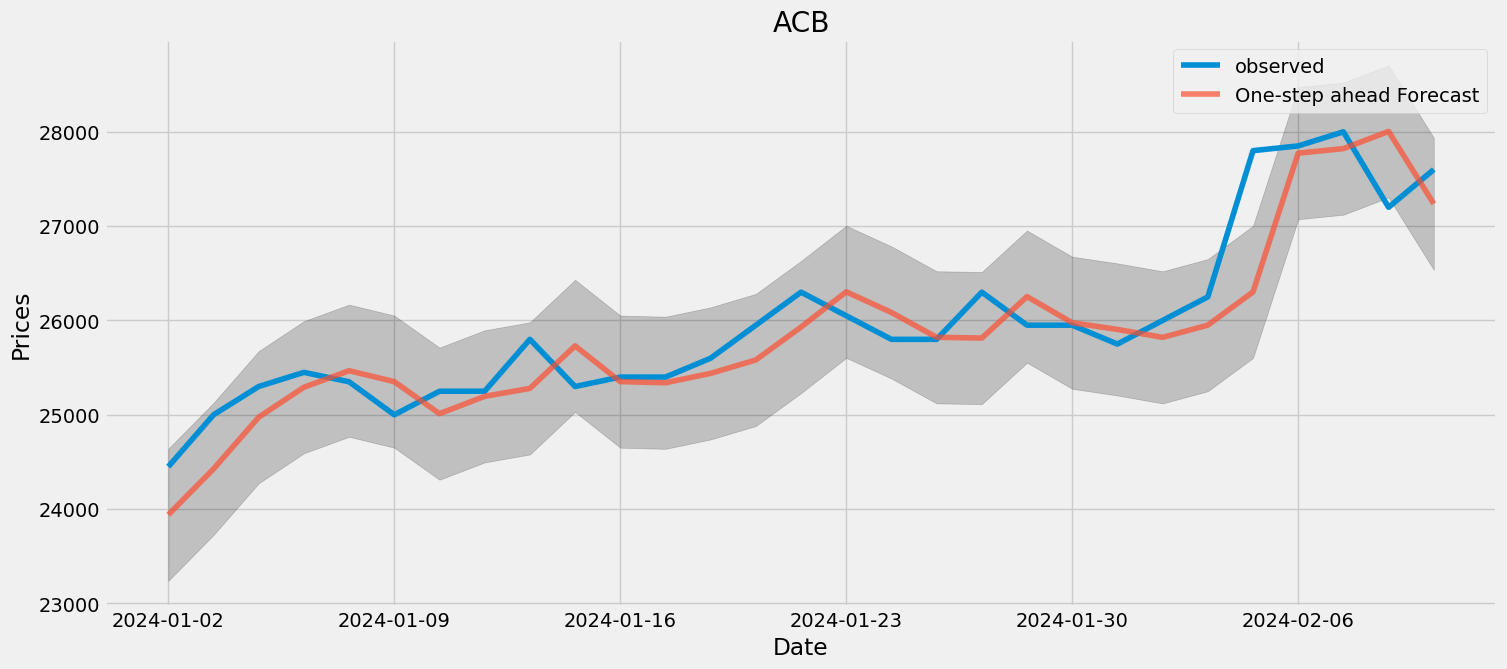

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41438D+00    |proj g|=  7.17360D-02

At iterate    5    f=  8.40913D+00    |proj g|=  4.69956D-03

At iterate   10    f=  8.40867D+00    |proj g|=  7.35605D-03

At iterate   15    f=  8.40862D+00    |proj g|=  6.38916D-04

At iterate   20    f=  8.40795D+00    |proj g|=  1.15296D-02

At iterate   25    f=  8.39036D+00    |proj g|=  1.11393D-01

At iterate   30    f=  8.32442D+00    |proj g|=  3.10866D-02

At iterate   35    f=  8.32101D+00    |proj g|=  8.36822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

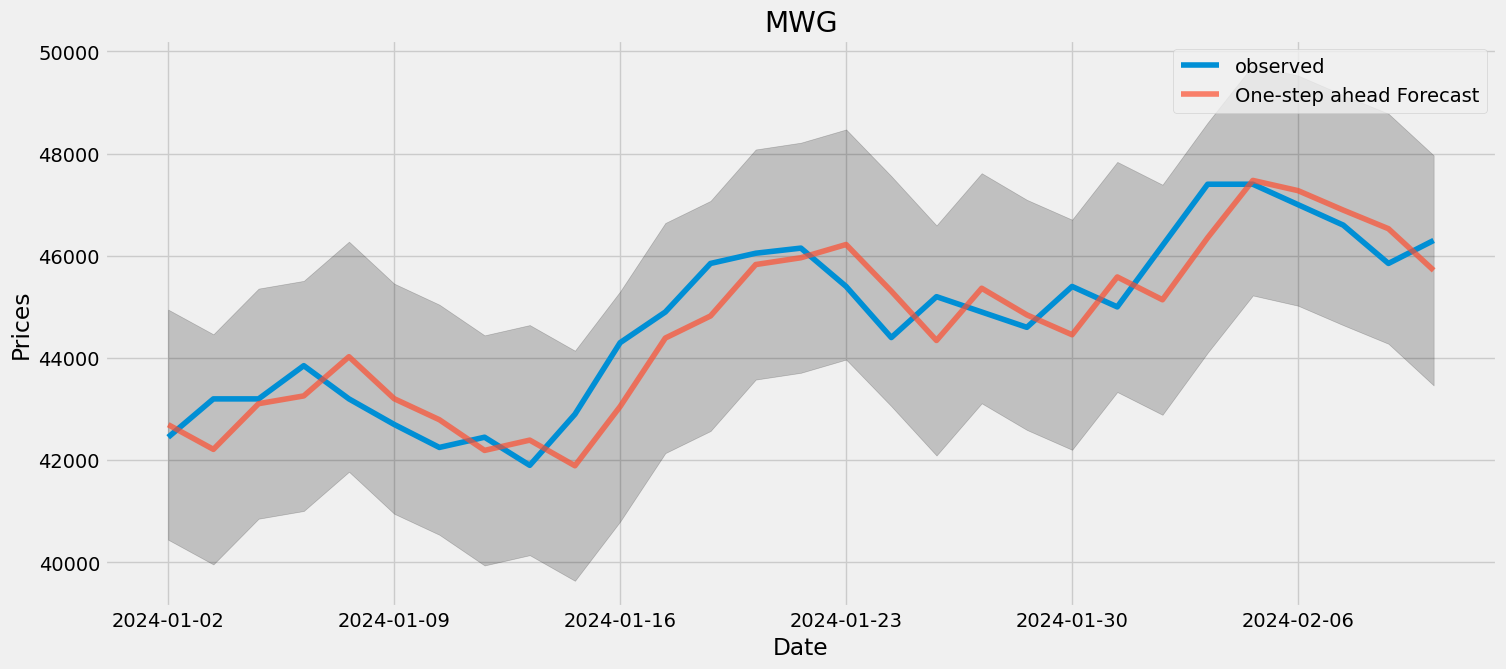

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98219D+00    |proj g|=  4.95402D-02

At iterate    5    f=  8.97978D+00    |proj g|=  1.25533D-04

At iterate   10    f=  8.97977D+00    |proj g|=  2.29656D-03

At iterate   15    f=  8.97701D+00    |proj g|=  9.09379D-03

At iterate   20    f=  8.97694D+00    |proj g|=  6.45496D-04

At iterate   25    f=  8.97688D+00    |proj g|=  9.87014D-03

At iterate   30    f=  8.96956D+00    |proj g|=  9.89662D-02

At iterate   35    f=  8.92847D+00    |proj g|=  2.04071D-02

At iterate   40    f=  8.92800D+00    |proj g|=  1.74861D-03

At iterate   45    f=  8.92763D+00    |proj g|=  4.78205D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.92603D+00    |proj g|=  5.69880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     76      1     0     0   5.699D-03   8.926D+00
  F =   8.9260258818346916     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7182      0.127     -5.649      0.000      -0.967      -0.469
ma.L1          0.7379      0.123      5.979      0.000       0.496       0.980
ar.S.L12       0.0531      0.029      1.844  

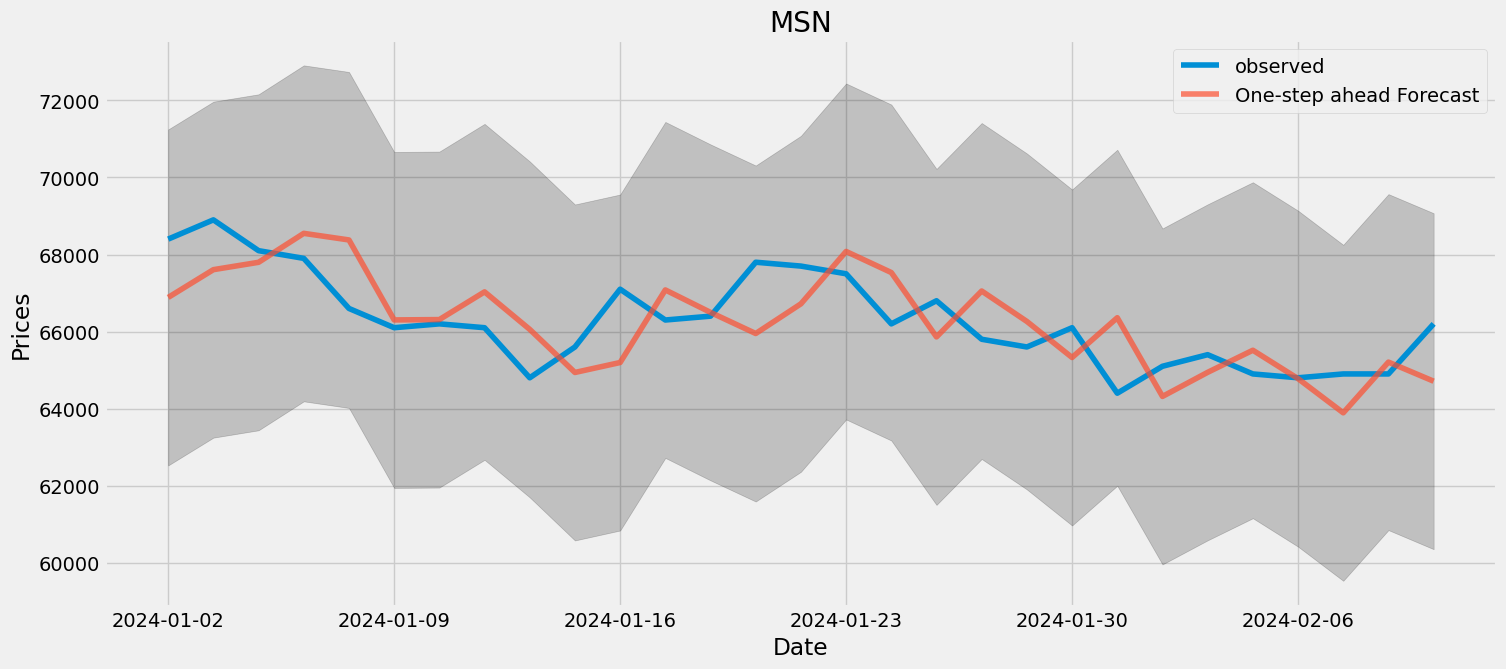

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95385D+00    |proj g|=  8.44711D-02

At iterate    5    f=  7.94168D+00    |proj g|=  1.62744D-02

At iterate   10    f=  7.94087D+00    |proj g|=  1.42861D-02

At iterate   15    f=  7.94055D+00    |proj g|=  5.40693D-04

At iterate   20    f=  7.94042D+00    |proj g|=  1.54568D-02

At iterate   25    f=  7.92472D+00    |proj g|=  1.66510D-01

At iterate   30    f=  7.84555D+00    |proj g|=  5.77752D-02

At iterate   35    f=  7.84094D+00    |proj g|=  2.51163D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

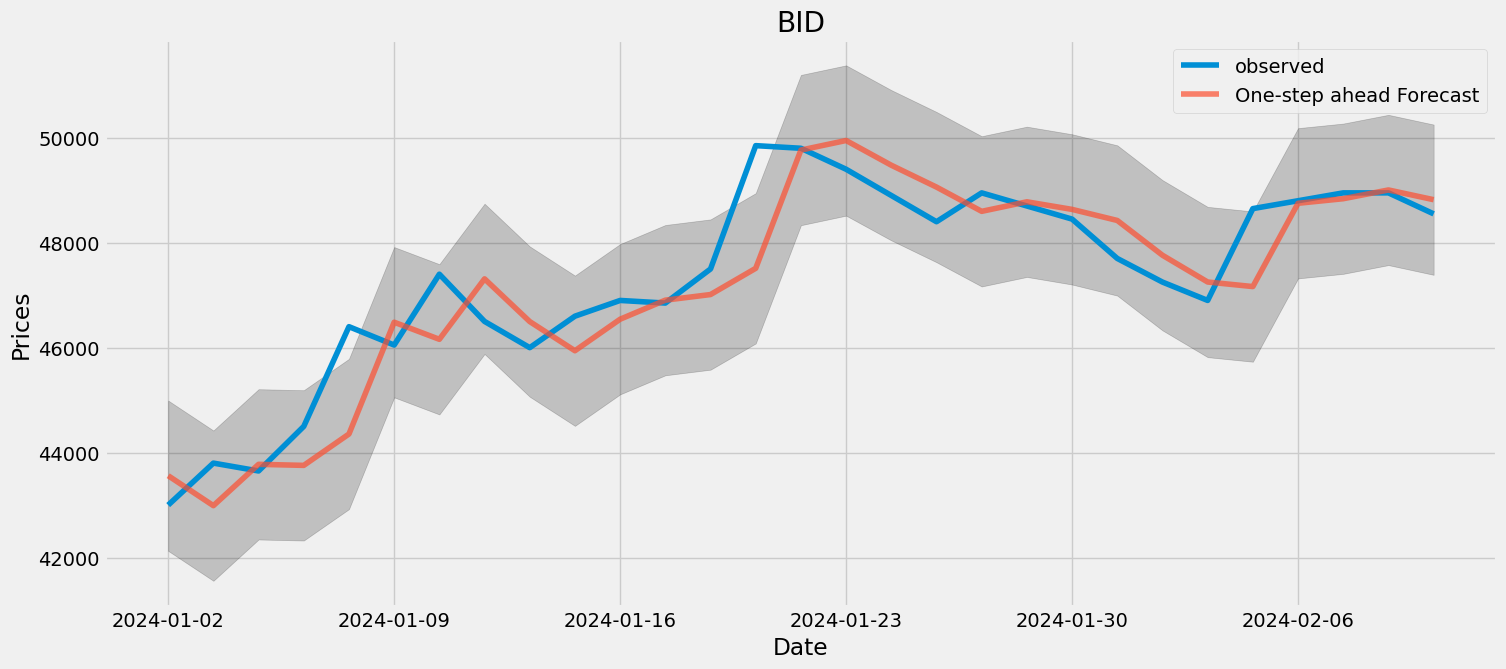

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15781D+00    |proj g|=  3.89491D-01

At iterate    5    f=  7.89121D+00    |proj g|=  2.30698D-02

At iterate   10    f=  7.88860D+00    |proj g|=  7.52435D-03

At iterate   15    f=  7.88850D+00    |proj g|=  1.52256D-03

At iterate   20    f=  7.88806D+00    |proj g|=  3.55842D-02

At iterate   25    f=  7.86279D+00    |proj g|=  9.47244D-02

At iterate   30    f=  7.78931D+00    |proj g|=  5.27823D-02

At iterate   35    f=  7.77281D+00    |proj g|=  4.12460D-03

At iterate   40    f=  7.77271D+00    |proj g|=  7.04850D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

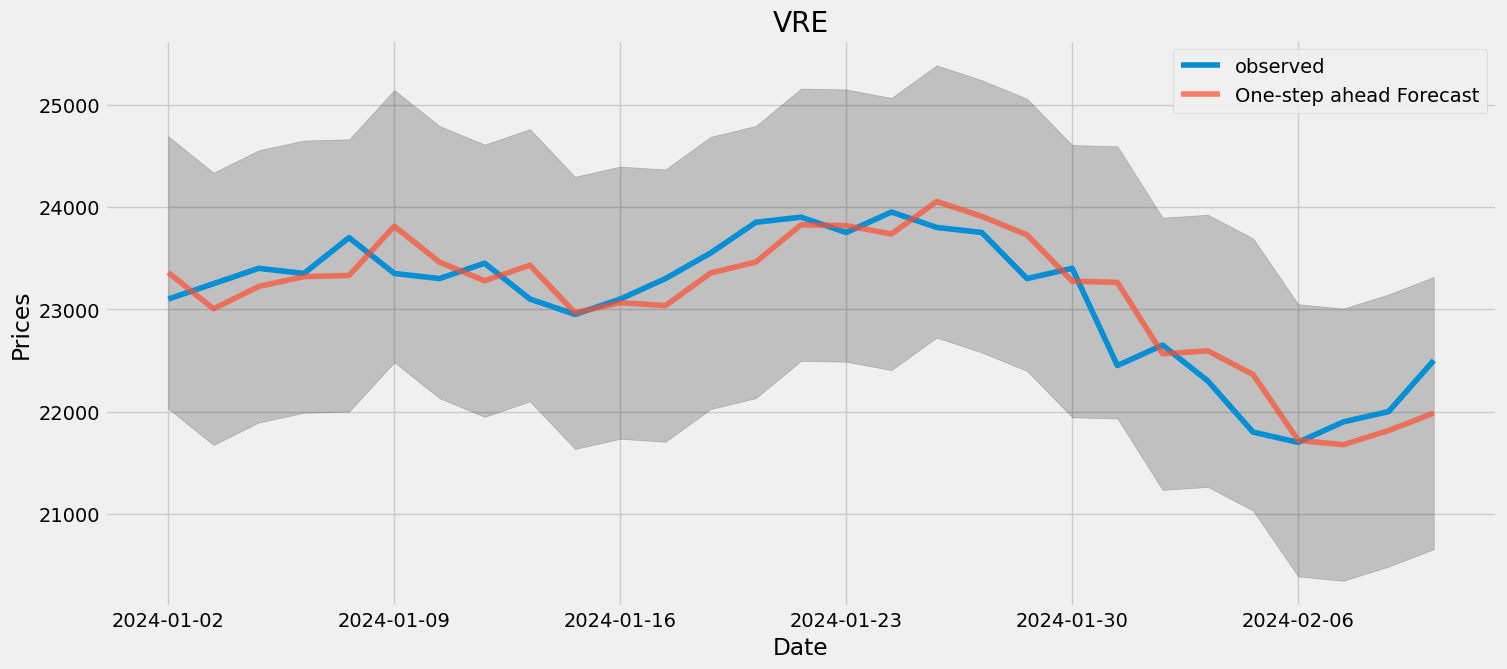

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13593D+00    |proj g|=  1.25959D-01

At iterate    5    f=  7.11048D+00    |proj g|=  2.59544D-02

At iterate   10    f=  7.10970D+00    |proj g|=  1.07091D-03

At iterate   15    f=  7.10883D+00    |proj g|=  3.05907D-02

At iterate   20    f=  7.10730D+00    |proj g|=  4.27389D-03

At iterate   25    f=  7.10694D+00    |proj g|=  2.43193D-02

At iterate   30    f=  7.05987D+00    |proj g|=  1.97597D-01

At iterate   35    f=  7.01443D+00    |proj g|=  1.41004D-01

At iterate   40    f=  7.01234D+00    |proj g|=  6.18443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

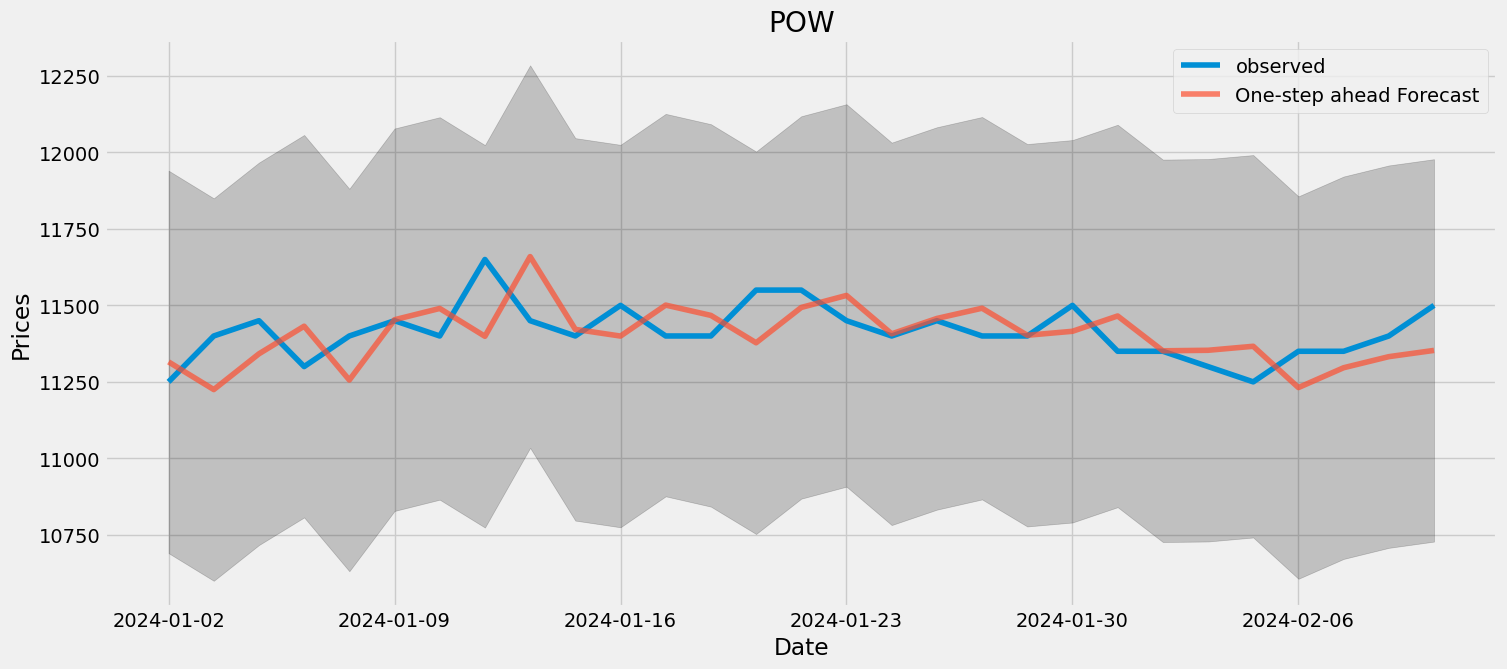

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12692D+00    |proj g|=  1.15212D-02

At iterate    5    f=  8.12639D+00    |proj g|=  3.64293D-04

At iterate   10    f=  8.12604D+00    |proj g|=  4.29376D-02

At iterate   15    f=  8.12484D+00    |proj g|=  6.09104D-03

At iterate   20    f=  8.12476D+00    |proj g|=  4.83748D-03

At iterate   25    f=  8.12023D+00    |proj g|=  9.25546D-02

At iterate   30    f=  8.03366D+00    |proj g|=  8.81251D-02

At iterate   35    f=  8.02393D+00    |proj g|=  2.45920D-02

At iterate   40    f=  8.02276D+00    |proj g|=  6.59387D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

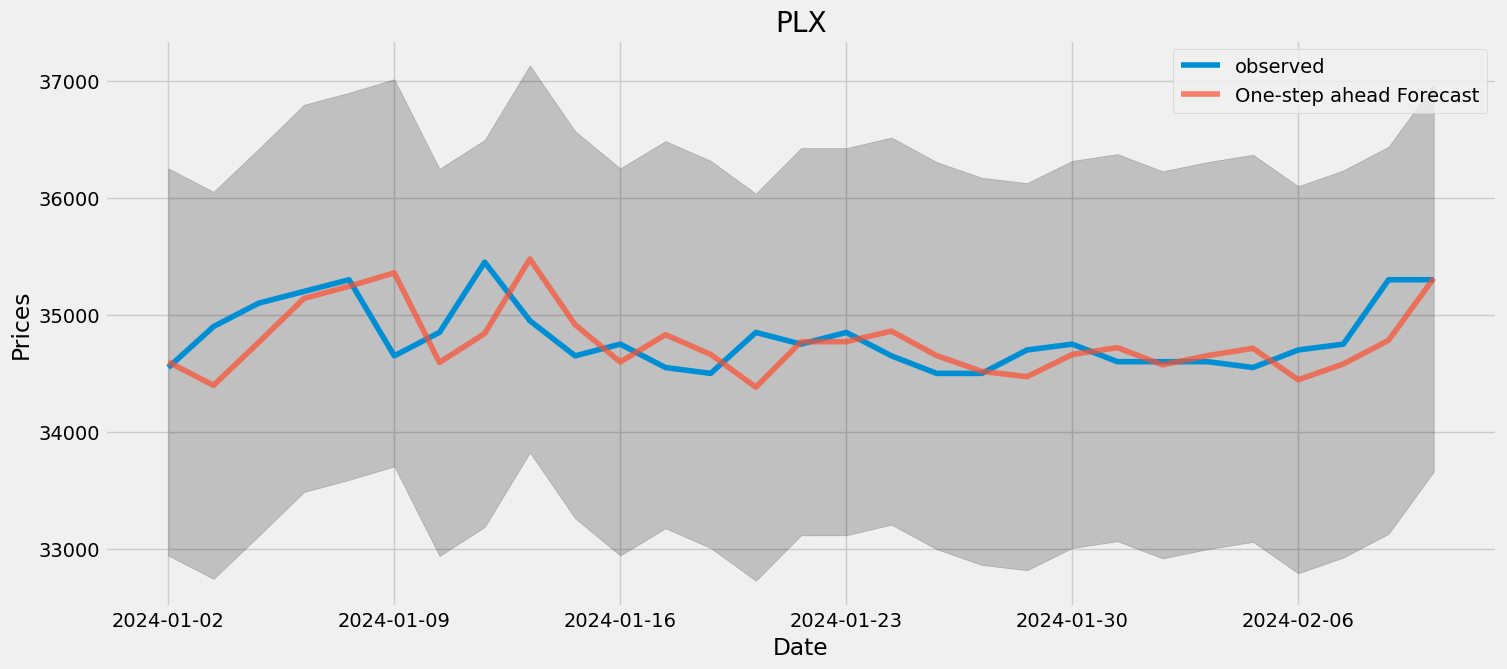

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71204D+00    |proj g|=  1.38735D-01

At iterate    5    f=  7.68430D+00    |proj g|=  1.66766D-02

At iterate   10    f=  7.68398D+00    |proj g|=  5.72260D-03

At iterate   15    f=  7.68289D+00    |proj g|=  3.68994D-02

At iterate   20    f=  7.68251D+00    |proj g|=  1.07129D-02

At iterate   25    f=  7.68244D+00    |proj g|=  5.88006D-04

At iterate   30    f=  7.68228D+00    |proj g|=  1.12388D-02

At iterate   35    f=  7.66970D+00    |proj g|=  1.19751D-01

At iterate   40    f=  7.59160D+00    |proj g|=  5.29509D-02

At iterate   45    f=  7.58953D+00    |proj g|=  1.91231D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.58942D+00    |proj g|=  3.74600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   3.746D-05   7.589D+00
  F =   7.5894213040047198     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8311      0.093     -8.972      0.000      -1.013      -0.650
ma.L1          0.8789      0.081     10.843      0.000       0.720       1.038
ar.S.L12      -0.0020      0.030     -0.067  

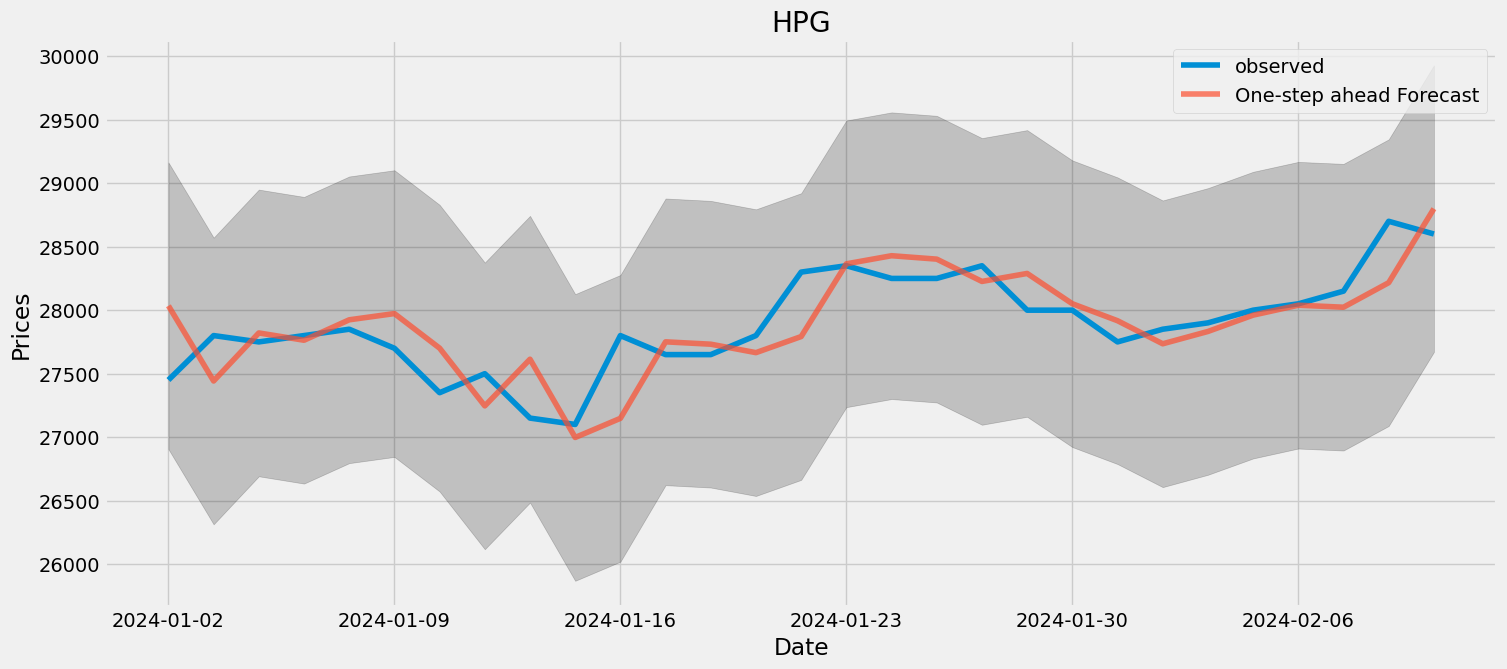

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62367D+00    |proj g|=  8.71848D-01

At iterate    5    f=  8.49373D+00    |proj g|=  7.79018D-02

At iterate   10    f=  8.48083D+00    |proj g|=  1.87107D-02

At iterate   15    f=  8.48078D+00    |proj g|=  2.11620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     20      1     0     0   2.116D-04   8.481D+00
  F =   8.4807818267654920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

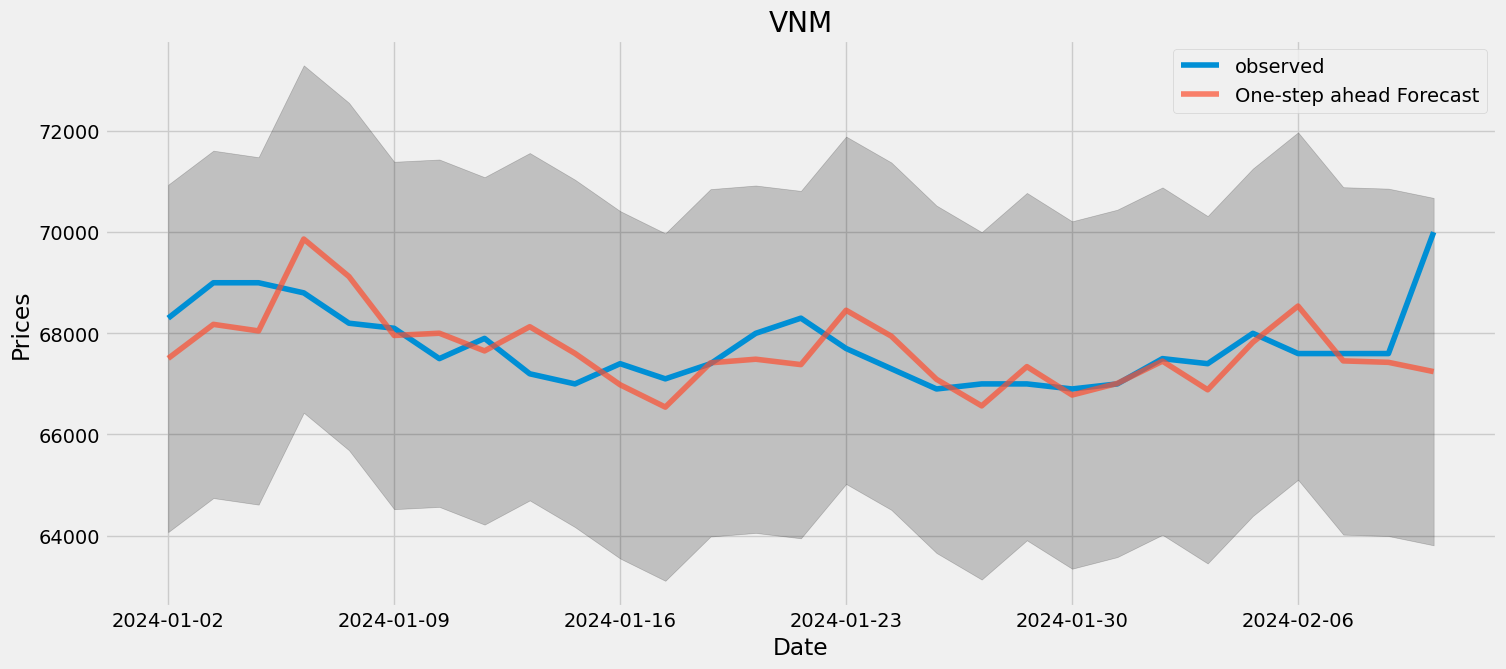

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54244D+00    |proj g|=  1.99779D-01

At iterate    5    f=  8.52010D+00    |proj g|=  6.89634D-03

At iterate   10    f=  8.51988D+00    |proj g|=  2.18979D-04

At iterate   15    f=  8.51986D+00    |proj g|=  3.79337D-03

At iterate   20    f=  8.51648D+00    |proj g|=  4.26336D-02

At iterate   25    f=  8.45113D+00    |proj g|=  4.03333D-02

At iterate   30    f=  8.44996D+00    |proj g|=  9.71741D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

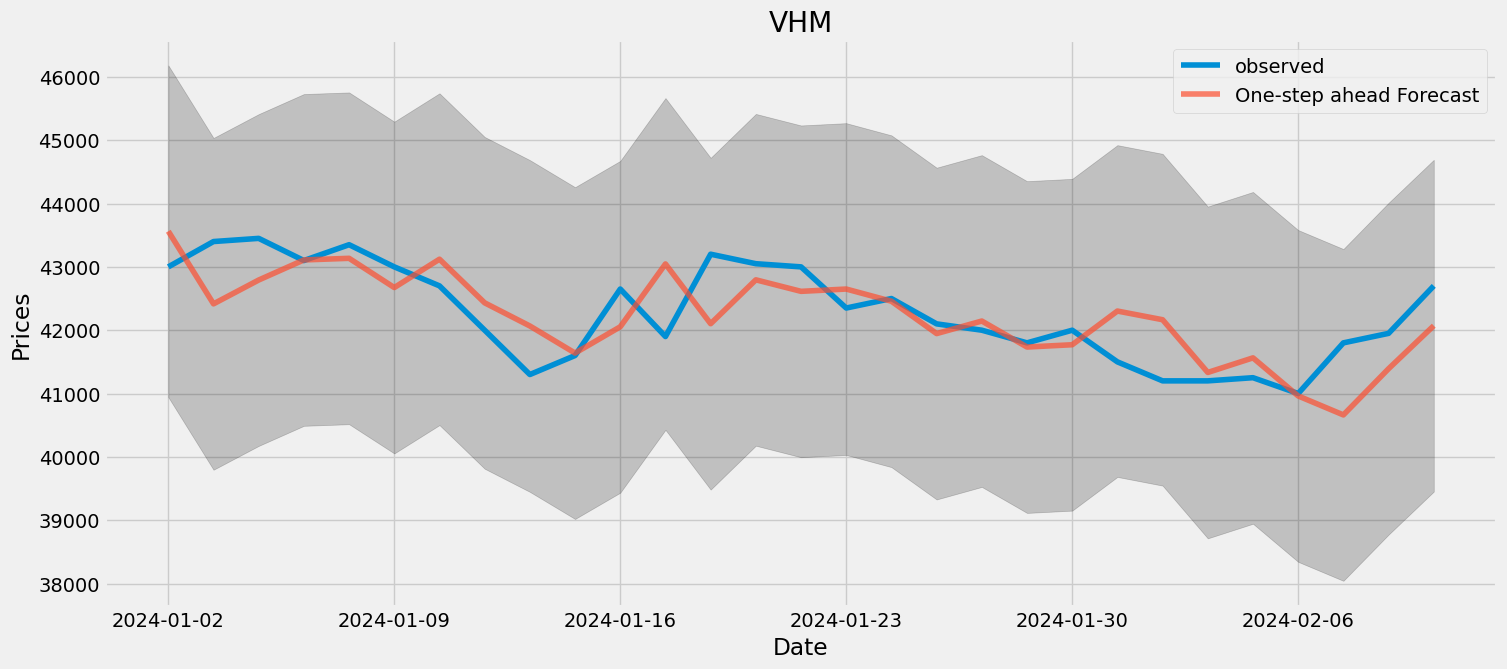

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29468D+00    |proj g|=  4.37667D-01

At iterate    5    f=  7.99237D+00    |proj g|=  1.40757D-02

At iterate   10    f=  7.99205D+00    |proj g|=  8.98122D-04

At iterate   15    f=  7.99199D+00    |proj g|=  4.44867D-04

At iterate   20    f=  7.99191D+00    |proj g|=  8.93603D-03

At iterate   25    f=  7.98759D+00    |proj g|=  8.64086D-02

At iterate   30    f=  7.91967D+00    |proj g|=  1.31518D-01

At iterate   35    f=  7.88942D+00    |proj g|=  6.33340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

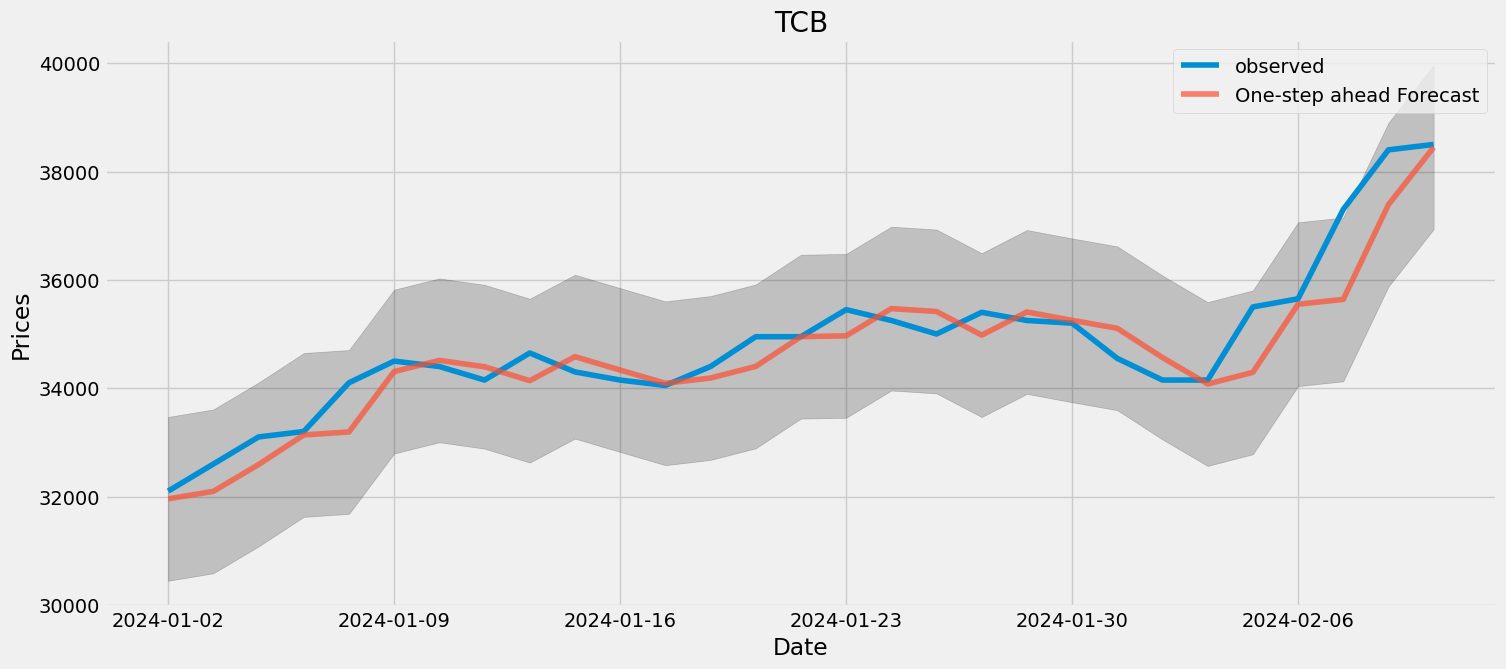

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11352D+00    |proj g|=  1.46957D-01

At iterate    5    f=  7.07953D+00    |proj g|=  5.01680D-02

At iterate   10    f=  7.07704D+00    |proj g|=  1.02597D-03

At iterate   15    f=  7.07666D+00    |proj g|=  2.04769D-02

At iterate   20    f=  7.05953D+00    |proj g|=  1.39307D-01

At iterate   25    f=  7.03586D+00    |proj g|=  1.01098D-01

At iterate   30    f=  7.02728D+00    |proj g|=  5.80134D-02

At iterate   35    f=  7.00984D+00    |proj g|=  1.57684D-01

At iterate   40    f=  7.00274D+00    |proj g|=  7.47724D-03

At iterate   45    f=  7.00246D+00    |proj g|=  1.27154D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.00237D+00    |proj g|=  3.55515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     78      1     0     0   3.555D-03   7.002D+00
  F =   7.0023710616888968     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7992      0.405      1.975      0.048       0.006       1.593
ma.L1         -1.2351      0.603     -2.047      0.041      -2.418      -0.052
ar.S.L12       0.0577      0.030      1.915  

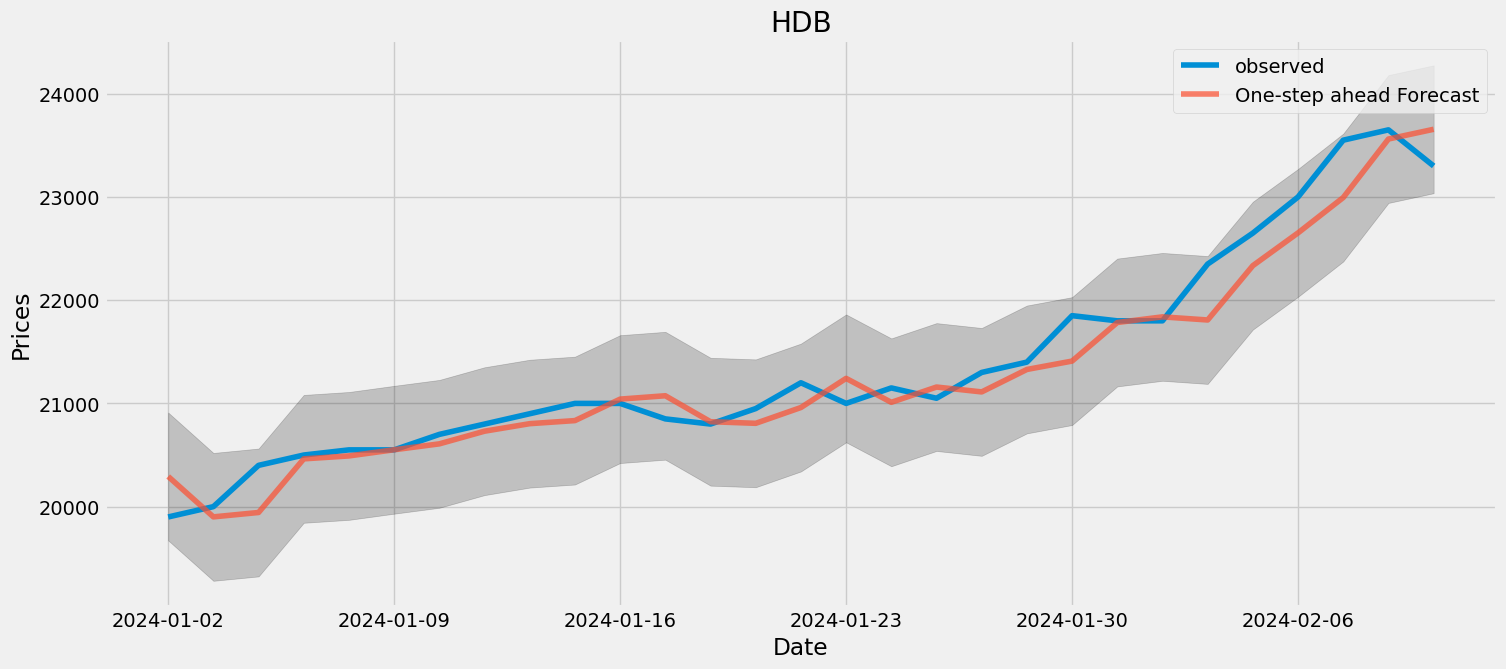

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33789D+00    |proj g|=  1.15435D-01

At iterate    5    f=  7.30152D+00    |proj g|=  1.26602D-02

At iterate   10    f=  7.30147D+00    |proj g|=  2.62126D-03

At iterate   15    f=  7.30026D+00    |proj g|=  2.63229D-02

At iterate   20    f=  7.29931D+00    |proj g|=  5.90463D-03

At iterate   25    f=  7.29916D+00    |proj g|=  1.13245D-02

At iterate   30    f=  7.28158D+00    |proj g|=  1.25083D-01

At iterate   35    f=  7.25396D+00    |proj g|=  4.42073D-02

At iterate   40    f=  7.24671D+00    |proj g|=  2.18114D-01

At iterate   45    f=  7.21155D+00    |proj g|=  7.63570D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.20914D+00    |proj g|=  1.03623D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     85      1     0     0   1.036D-02   7.209D+00
  F =   7.2091351510067563     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5323      0.206      2.583      0.010       0.128       0.936
ma.L1         -0.4628      0.216     -2.147      0.032      -0.885      -0.040
ar.S.L12      -0.0093      0.029     -0.317  

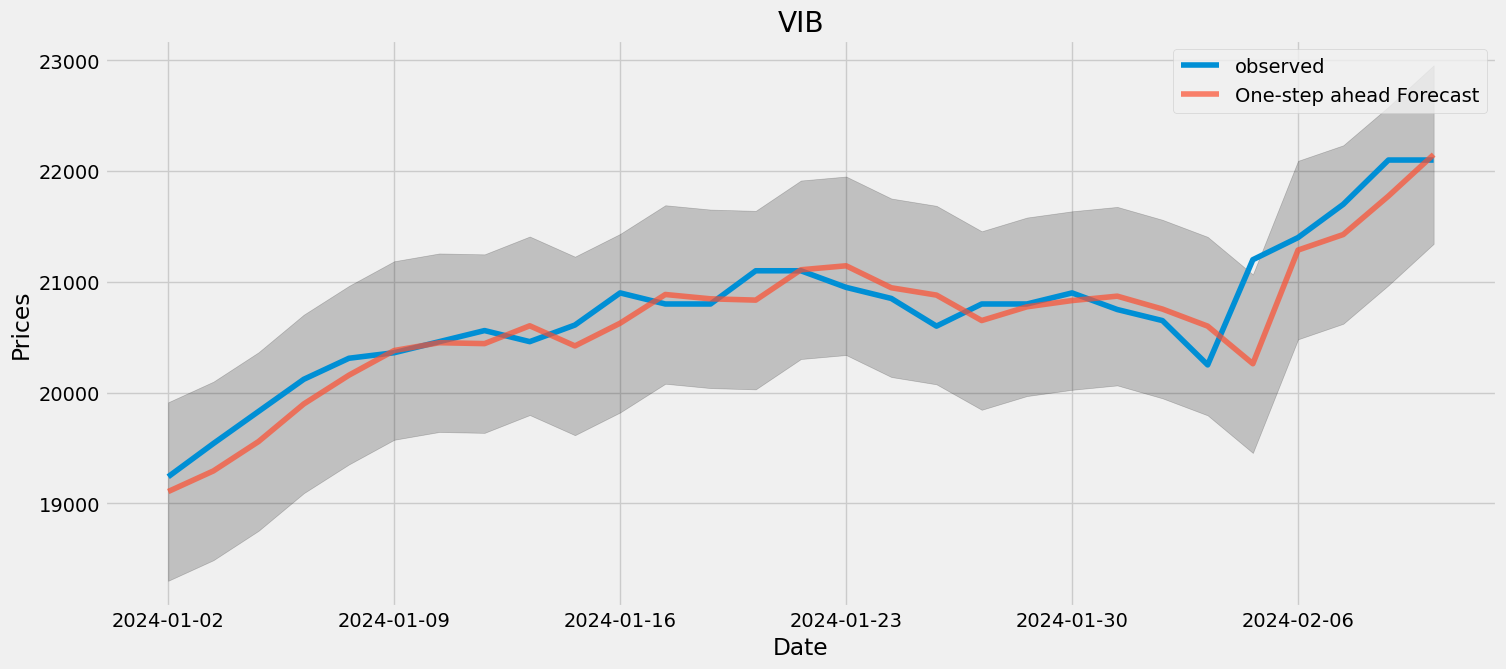

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66507D+00    |proj g|=  2.38679D-01

At iterate    5    f=  8.44764D+00    |proj g|=  2.34234D-01

At iterate   10    f=  8.40128D+00    |proj g|=  2.30967D-02

At iterate   15    f=  8.40077D+00    |proj g|=  9.66810D-03

At iterate   20    f=  8.40057D+00    |proj g|=  2.35511D-04

At iterate   25    f=  8.40056D+00    |proj g|=  2.92559D-03

At iterate   30    f=  8.39901D+00    |proj g|=  2.98206D-02

At iterate   35    f=  8.38405D+00    |proj g|=  5.30383D-02

At iterate   40    f=  8.36145D+00    |proj g|=  9.05040D-02

At iterate   45    f=  8.33432D+00    |proj g|=  5.47532D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.33426D+00    |proj g|=  8.52207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   8.522D-05   8.334D+00
  F =   8.3342615343476094     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1589      0.089      1.782      0.075      -0.016       0.334
ma.L1         -0.1400      0.085     -1.640      0.101      -0.307       0.027
ar.S.L12       0.1671      0.017      9.680  

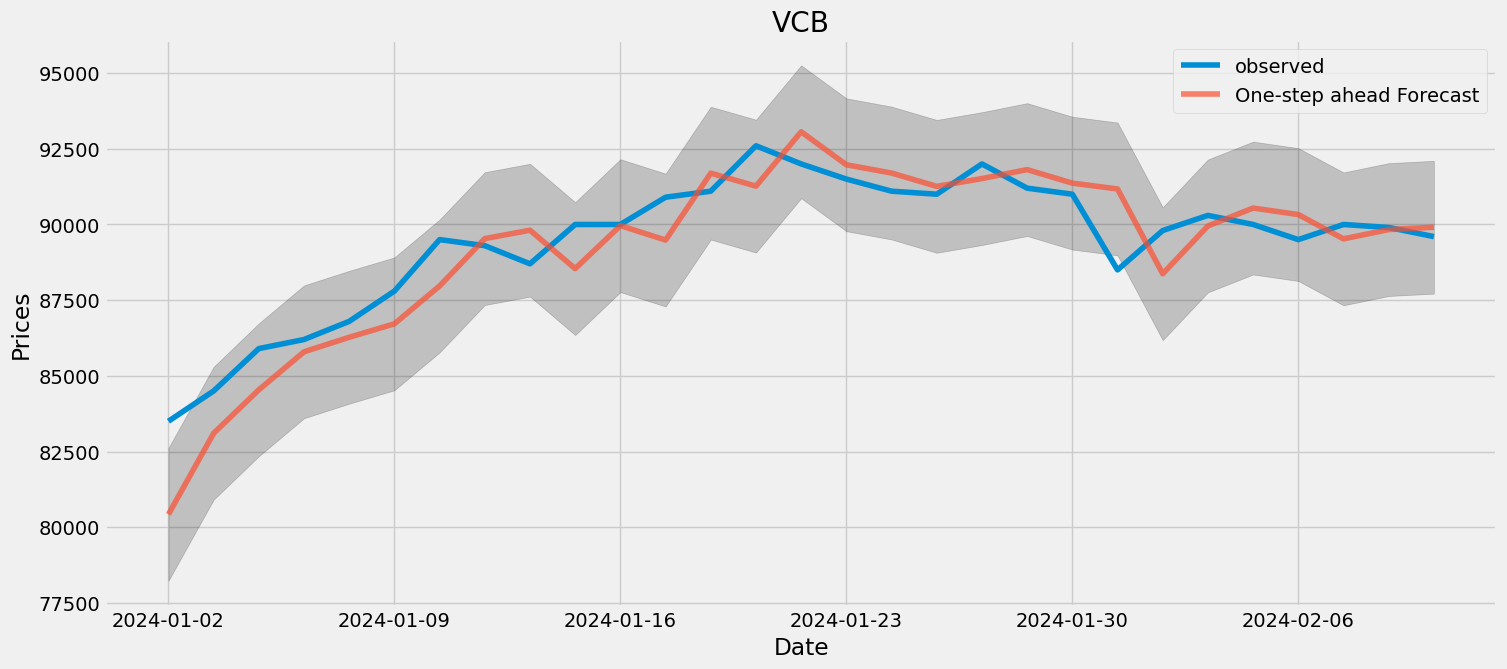

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98198D+00    |proj g|=  7.44148D-01

At iterate    5    f=  8.91132D+00    |proj g|=  1.28046D-02

At iterate   10    f=  8.91122D+00    |proj g|=  1.77862D-03

At iterate   15    f=  8.91076D+00    |proj g|=  3.00115D-02

At iterate   20    f=  8.91020D+00    |proj g|=  1.13865D-04

At iterate   25    f=  8.91019D+00    |proj g|=  3.71638D-03

At iterate   30    f=  8.90753D+00    |proj g|=  4.04475D-02

At iterate   35    f=  8.89728D+00    |proj g|=  3.71496D-02

At iterate   40    f=  8.89413D+00    |proj g|=  6.68184D-02

At iterate   45    f=  8.88233D+00    |proj g|=  8.33598D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.87889D+00    |proj g|=  1.97911D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     76      1     0     0   1.979D-02   8.879D+00
  F =   8.8788855401157978     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5786      0.181     -3.204      0.001      -0.933      -0.225
ma.L1          0.6189      0.181      3.424      0.001       0.265       0.973
ar.S.L12      -0.2315      0.034     -6.780  

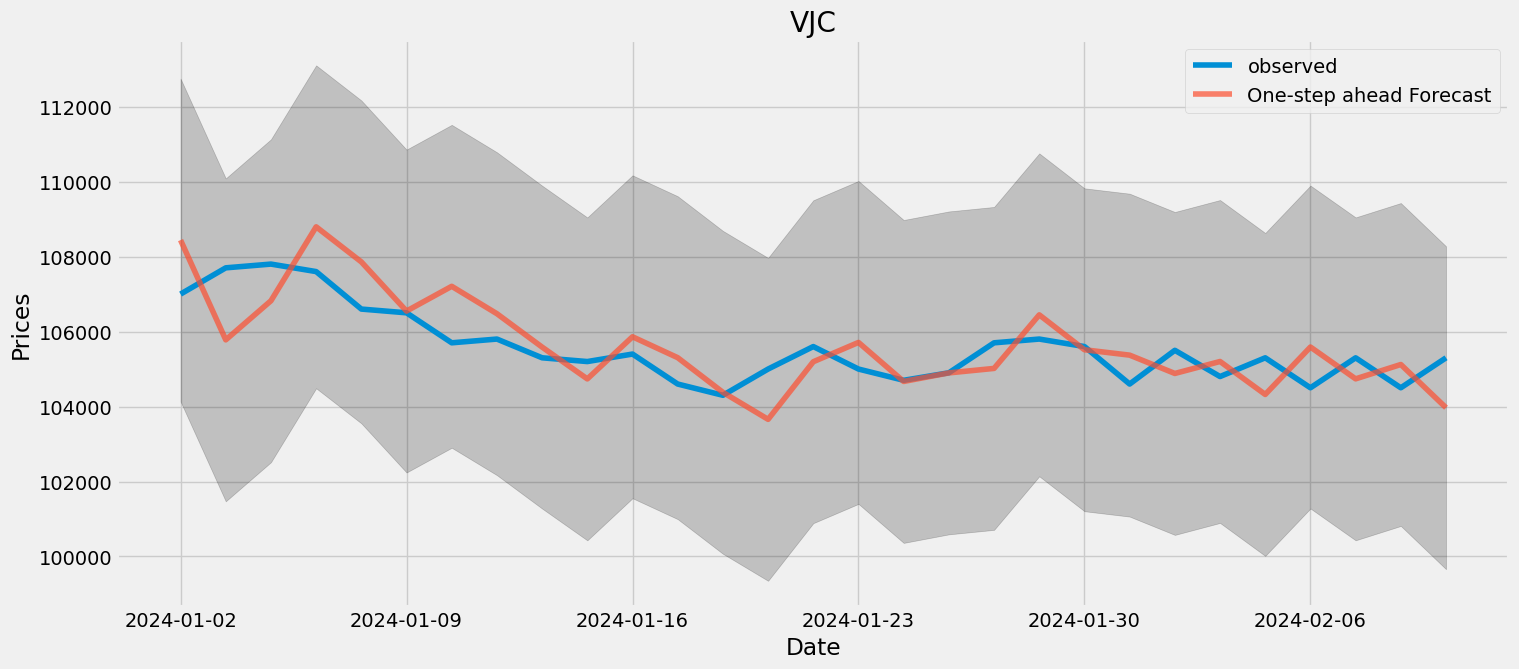

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76002D+00    |proj g|=  3.48613D-01

At iterate    5    f=  8.73376D+00    |proj g|=  2.37590D-02

At iterate   10    f=  8.73348D+00    |proj g|=  3.33409D-03

At iterate   15    f=  8.73165D+00    |proj g|=  3.99757D-02

At iterate   20    f=  8.73084D+00    |proj g|=  1.18380D-03

At iterate   25    f=  8.73084D+00    |proj g|=  2.53048D-04

At iterate   30    f=  8.73080D+00    |proj g|=  5.54673D-03

At iterate   35    f=  8.72555D+00    |proj g|=  9.05587D-02

At iterate   40    f=  8.70188D+00    |proj g|=  4.69483D-02

At iterate   45    f=  8.70117D+00    |proj g|=  1.33102D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.70030D+00    |proj g|=  1.59478D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   1.595D-02   8.700D+00
  F =   8.7002955721589075     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5276      0.141     -3.733      0.000      -0.805      -0.251
ma.L1          0.5648      0.138      4.098      0.000       0.295       0.835
ar.S.L12      -0.0987      0.028     -3.472  

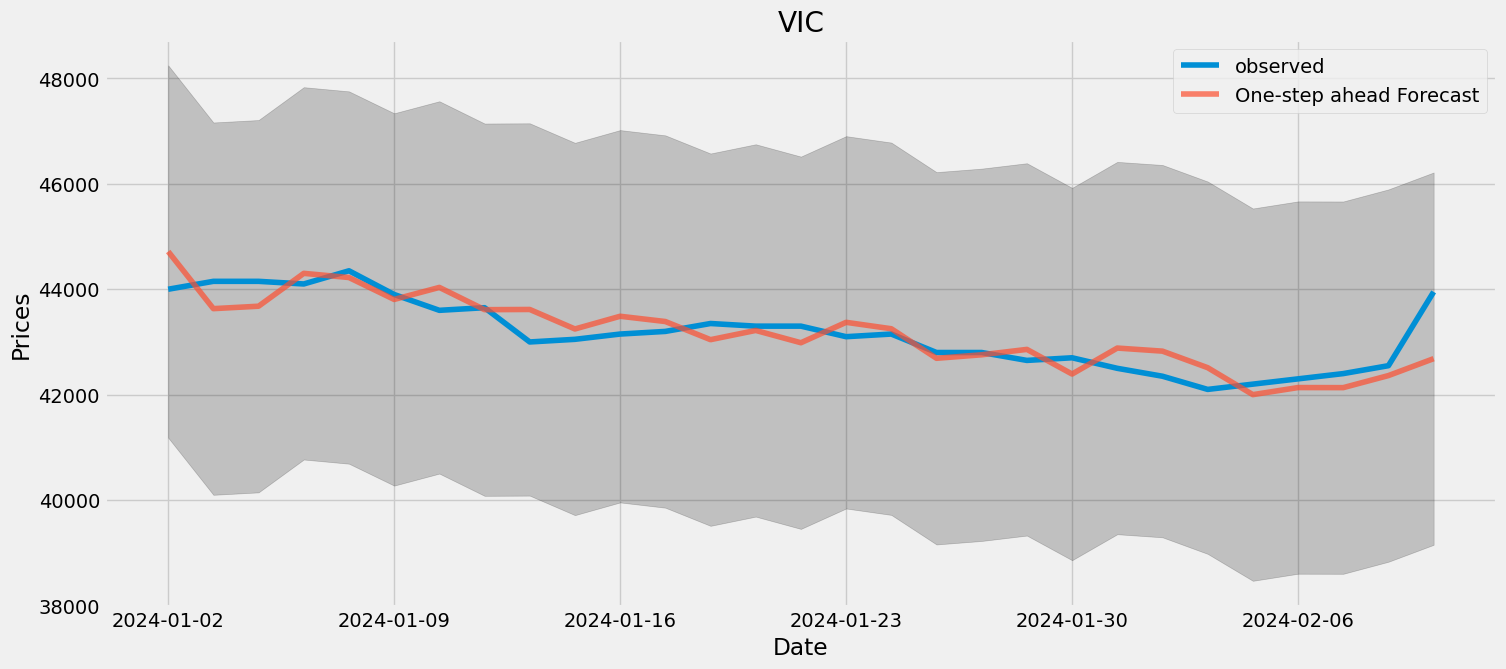

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32161D+00    |proj g|=  9.44119D-02

At iterate    5    f=  8.31220D+00    |proj g|=  2.70903D-03

At iterate   10    f=  8.31167D+00    |proj g|=  1.94056D-03

At iterate   15    f=  8.31164D+00    |proj g|=  3.81347D-03

At iterate   20    f=  8.30828D+00    |proj g|=  5.73790D-02

At iterate   25    f=  8.22528D+00    |proj g|=  5.83052D-02

At iterate   30    f=  8.20168D+00    |proj g|=  1.64616D-02

At iterate   35    f=  8.20029D+00    |proj g|=  3.17176D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

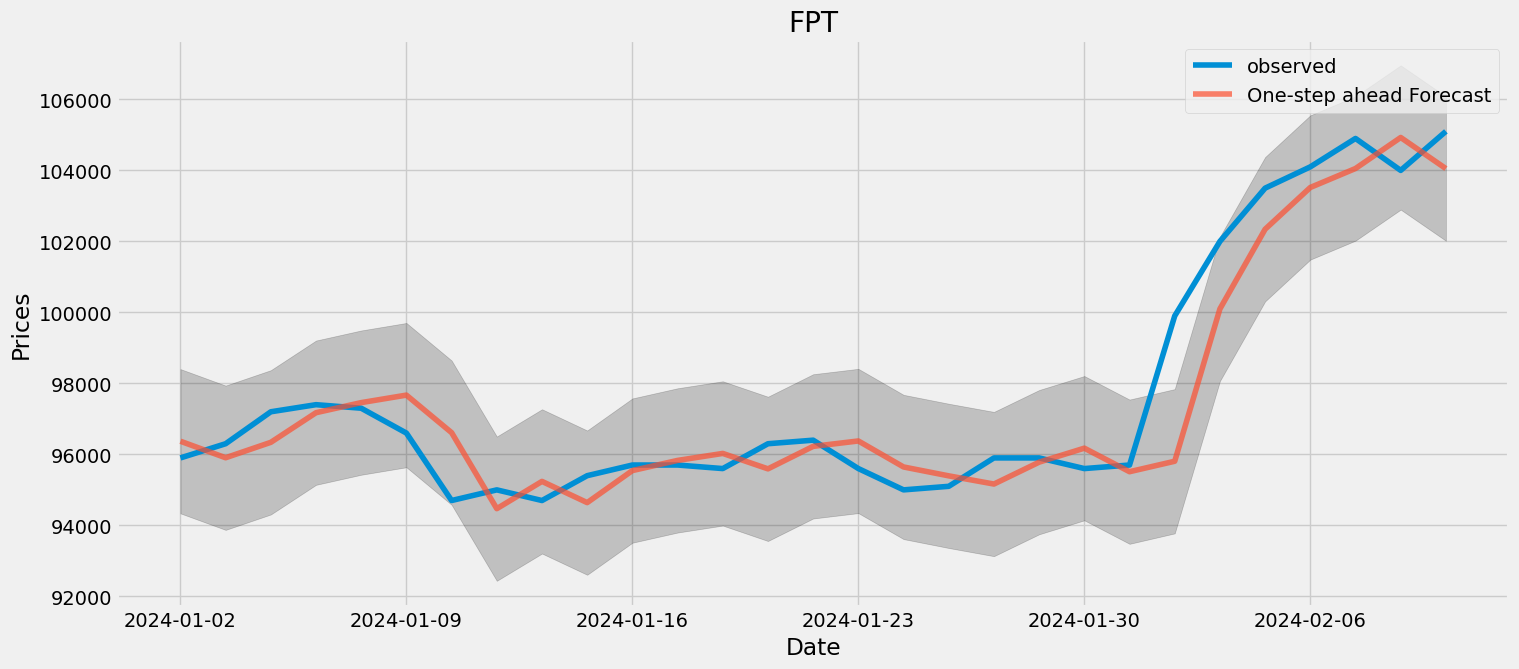

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67784D+00    |proj g|=  9.57719D-02

At iterate    5    f=  7.65219D+00    |proj g|=  1.18087D-02

At iterate   10    f=  7.65192D+00    |proj g|=  6.17287D-04

At iterate   15    f=  7.65179D+00    |proj g|=  1.92928D-02

At iterate   20    f=  7.65150D+00    |proj g|=  9.39167D-04

At iterate   25    f=  7.65137D+00    |proj g|=  1.54834D-02

At iterate   30    f=  7.64699D+00    |proj g|=  6.74363D-02

At iterate   35    f=  7.58458D+00    |proj g|=  1.72670D-01

At iterate   40    f=  7.55432D+00    |proj g|=  1.54249D-02

At iterate   45    f=  7.55413D+00    |proj g|=  8.57226D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.55393D+00    |proj g|=  1.03734D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   1.037D-04   7.554D+00
  F =   7.5539327157219489     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2048      0.550      0.372      0.710      -0.873       1.283
ma.L1         -0.2329      0.549     -0.424      0.671      -1.308       0.843
ar.S.L12      -0.0254      0.029     -0.881  

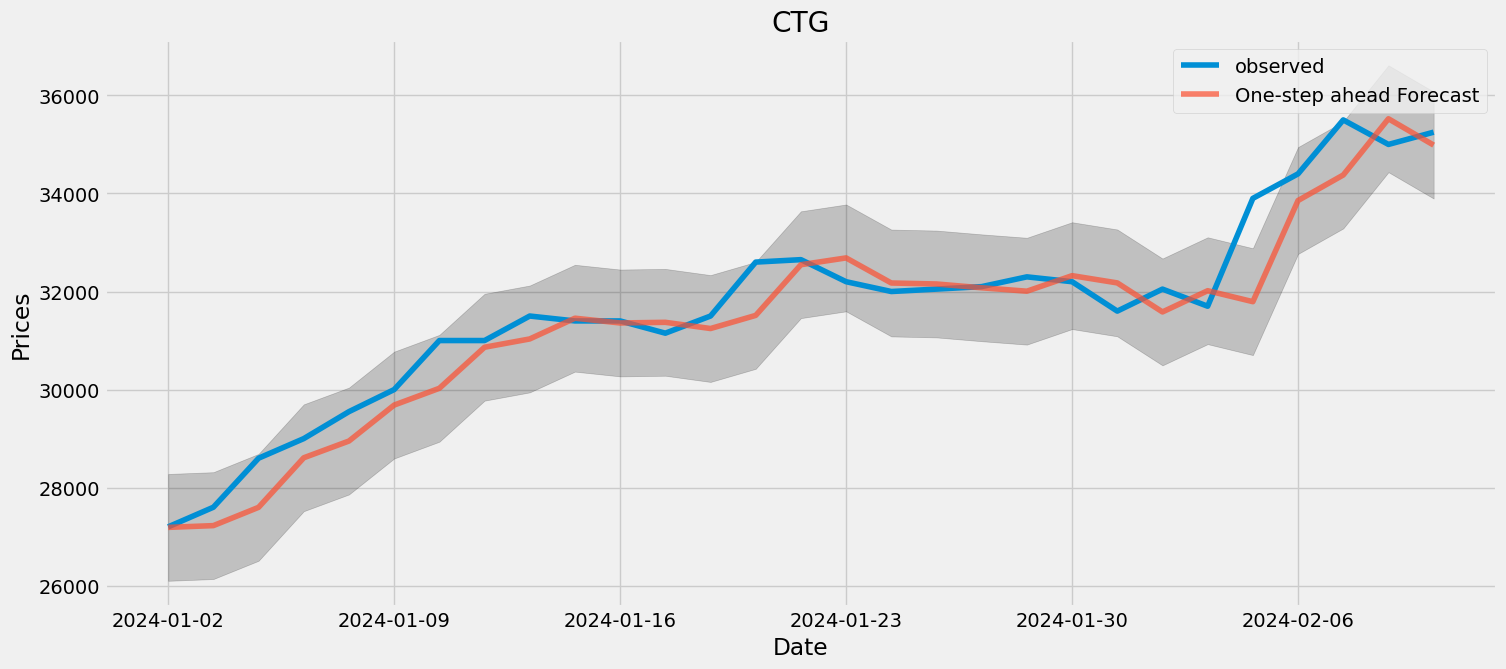

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30473D+00    |proj g|=  1.18517D-01

At iterate    5    f=  7.27668D+00    |proj g|=  2.53301D-02

At iterate   10    f=  7.27630D+00    |proj g|=  2.18922D-03

At iterate   15    f=  7.27612D+00    |proj g|=  1.13608D-02

At iterate   20    f=  7.27599D+00    |proj g|=  9.88802D-03

At iterate   25    f=  7.27156D+00    |proj g|=  6.09792D-02

At iterate   30    f=  7.21659D+00    |proj g|=  1.83591D-01

At iterate   35    f=  7.19791D+00    |proj g|=  6.78266D-03

At iterate   40    f=  7.19787D+00    |proj g|=  9.97806D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

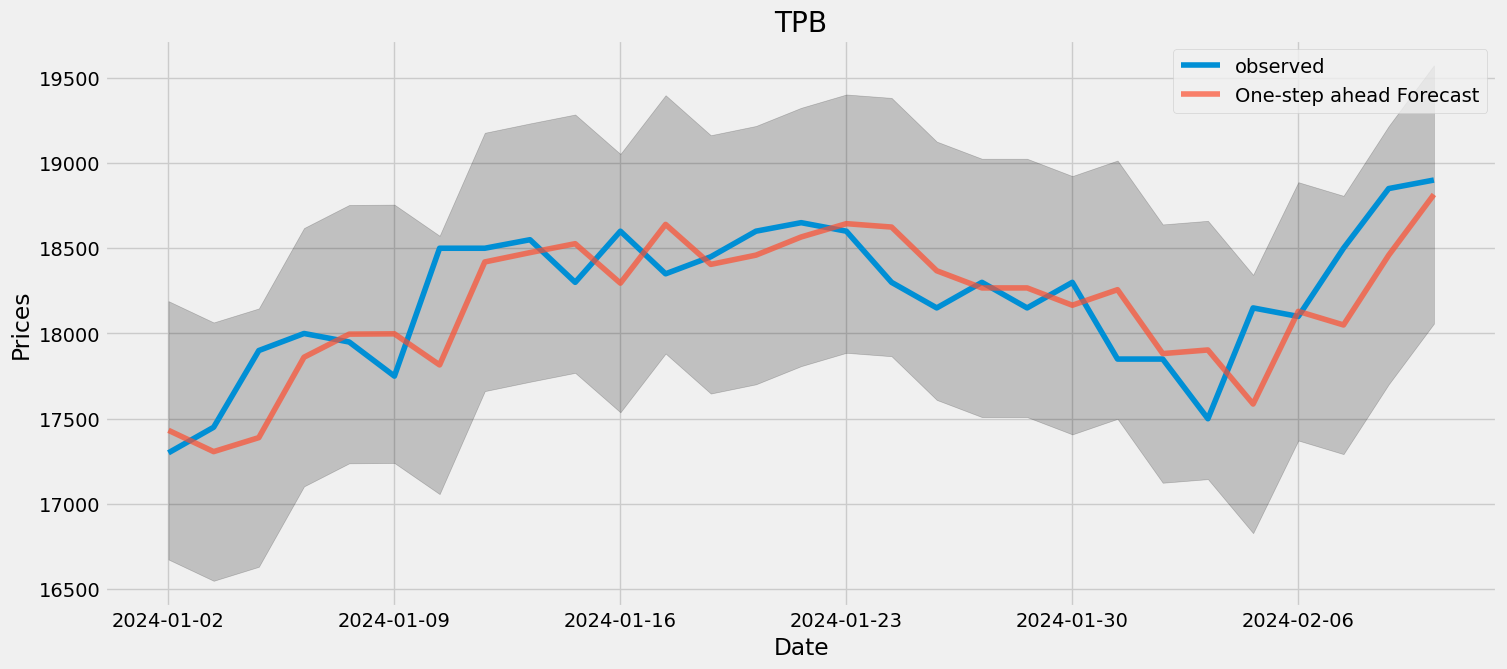

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33579D+00    |proj g|=  6.05334D-02

At iterate    5    f=  8.33398D+00    |proj g|=  2.18015D-03

At iterate   10    f=  8.33388D+00    |proj g|=  2.83339D-04

At iterate   15    f=  8.33382D+00    |proj g|=  3.91020D-03

At iterate   20    f=  8.32984D+00    |proj g|=  1.48721D-02

At iterate   25    f=  8.32798D+00    |proj g|=  2.40689D-02

At iterate   30    f=  8.26424D+00    |proj g|=  1.04614D-01

At iterate   35    f=  8.25643D+00    |proj g|=  1.88774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

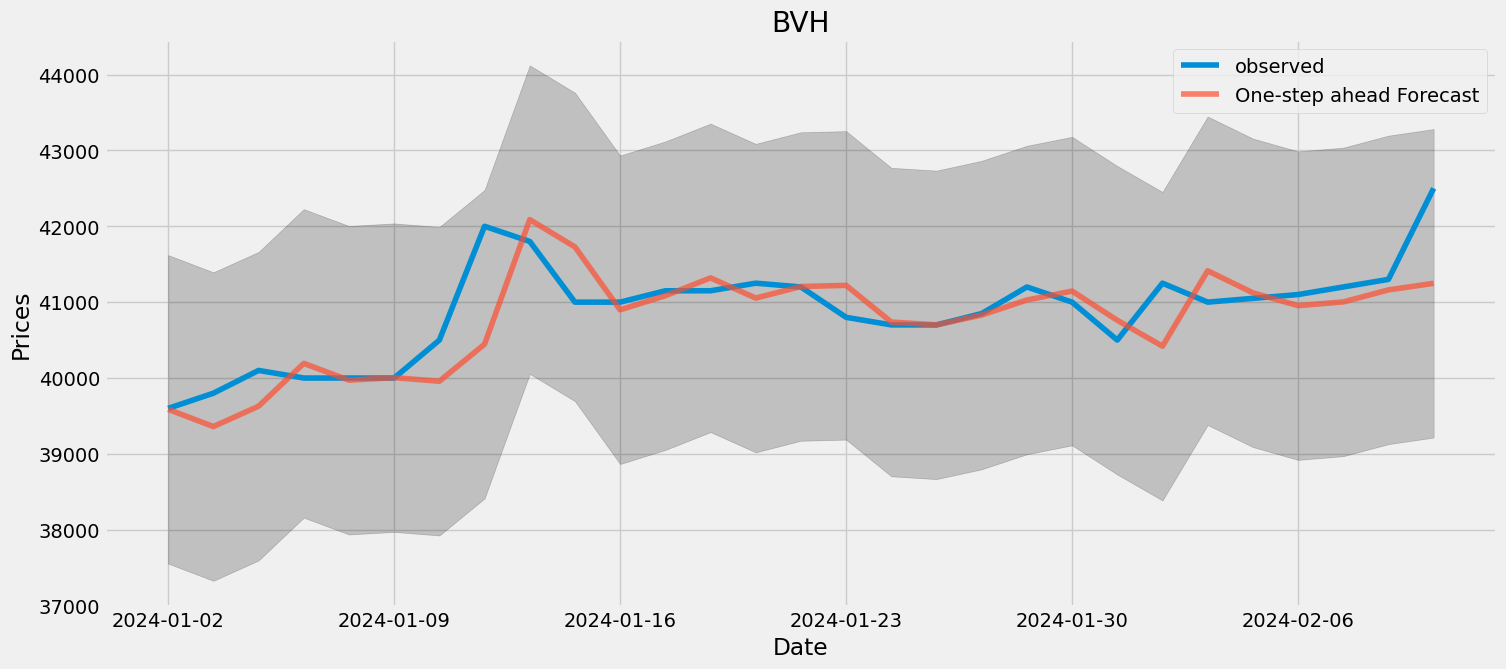

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82854D+00    |proj g|=  1.22672D-01

At iterate    5    f=  7.80879D+00    |proj g|=  7.51957D-03

At iterate   10    f=  7.80871D+00    |proj g|=  3.59432D-03

At iterate   15    f=  7.80859D+00    |proj g|=  5.14499D-04

At iterate   20    f=  7.80848D+00    |proj g|=  1.24093D-02

At iterate   25    f=  7.80119D+00    |proj g|=  1.00213D-01

At iterate   30    f=  7.72590D+00    |proj g|=  1.41239D-01

At iterate   35    f=  7.70814D+00    |proj g|=  2.44723D-02

At iterate   40    f=  7.70366D+00    |proj g|=  7.82586D-03

At iterate   45    f=  7.70360D+00    |proj g|=  8.54463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

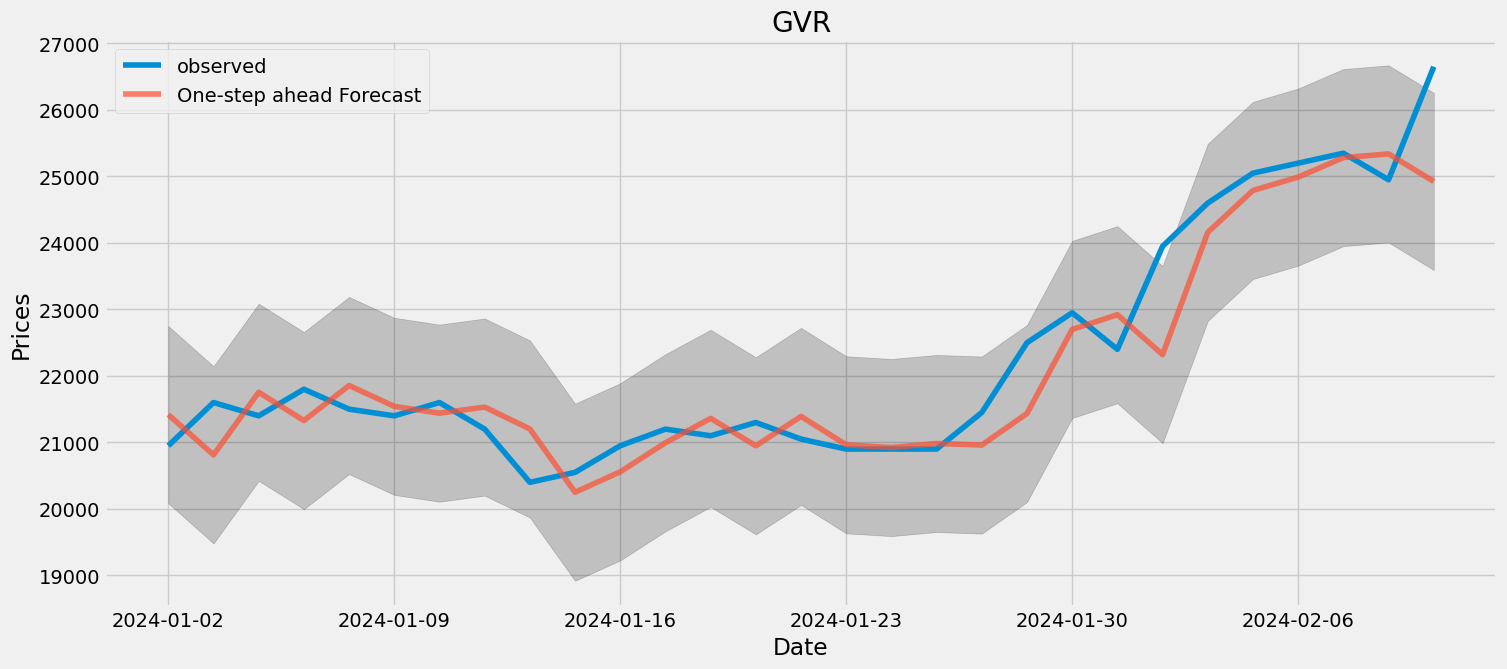

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68898D+00    |proj g|=  3.26486D-01

At iterate    5    f=  8.65988D+00    |proj g|=  3.08091D-02

At iterate   10    f=  8.65923D+00    |proj g|=  4.66563D-03

At iterate   15    f=  8.65879D+00    |proj g|=  1.91716D-03

At iterate   20    f=  8.65763D+00    |proj g|=  7.46738D-02

At iterate   25    f=  8.65644D+00    |proj g|=  5.15037D-04

At iterate   30    f=  8.65644D+00    |proj g|=  1.13147D-03

At iterate   35    f=  8.65638D+00    |proj g|=  2.19099D-02

At iterate   40    f=  8.64304D+00    |proj g|=  5.32952D-02

At iterate   45    f=  8.62733D+00    |proj g|=  1.48429D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.62691D+00    |proj g|=  8.65129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   8.651D-03   8.627D+00
  F =   8.6269083466799295     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1670      0.192      0.868      0.385      -0.210       0.544
ma.L1         -0.0440      0.203     -0.217      0.828      -0.441       0.353
ar.S.L12      -0.1904      0.041     -4.676  

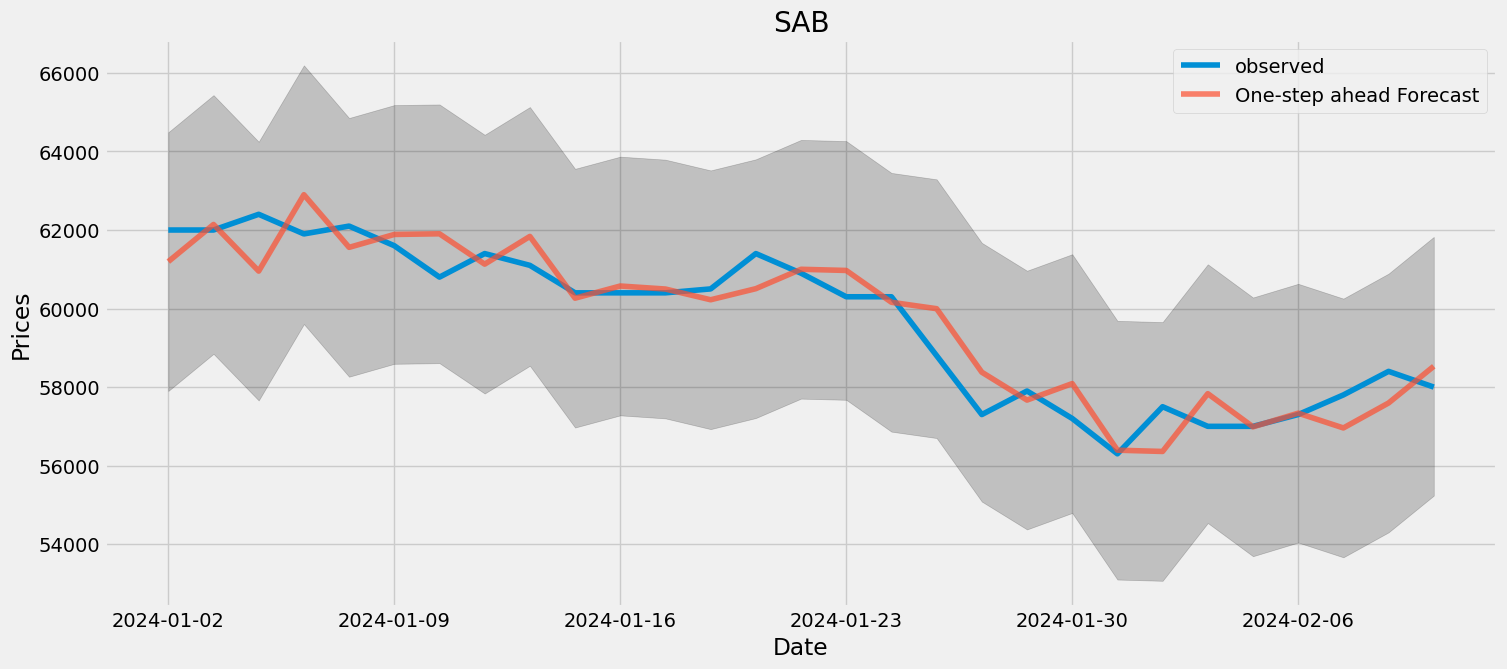

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51545D+00    |proj g|=  1.32848D-01

At iterate    5    f=  8.49399D+00    |proj g|=  8.48032D-03

At iterate   10    f=  8.49264D+00    |proj g|=  1.99284D-02

At iterate   15    f=  8.49238D+00    |proj g|=  4.48484D-04

At iterate   20    f=  8.49180D+00    |proj g|=  1.79597D-02

At iterate   25    f=  8.45633D+00    |proj g|=  1.47502D-01

At iterate   30    f=  8.40912D+00    |proj g|=  3.99432D-02

At iterate   35    f=  8.40809D+00    |proj g|=  8.68066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

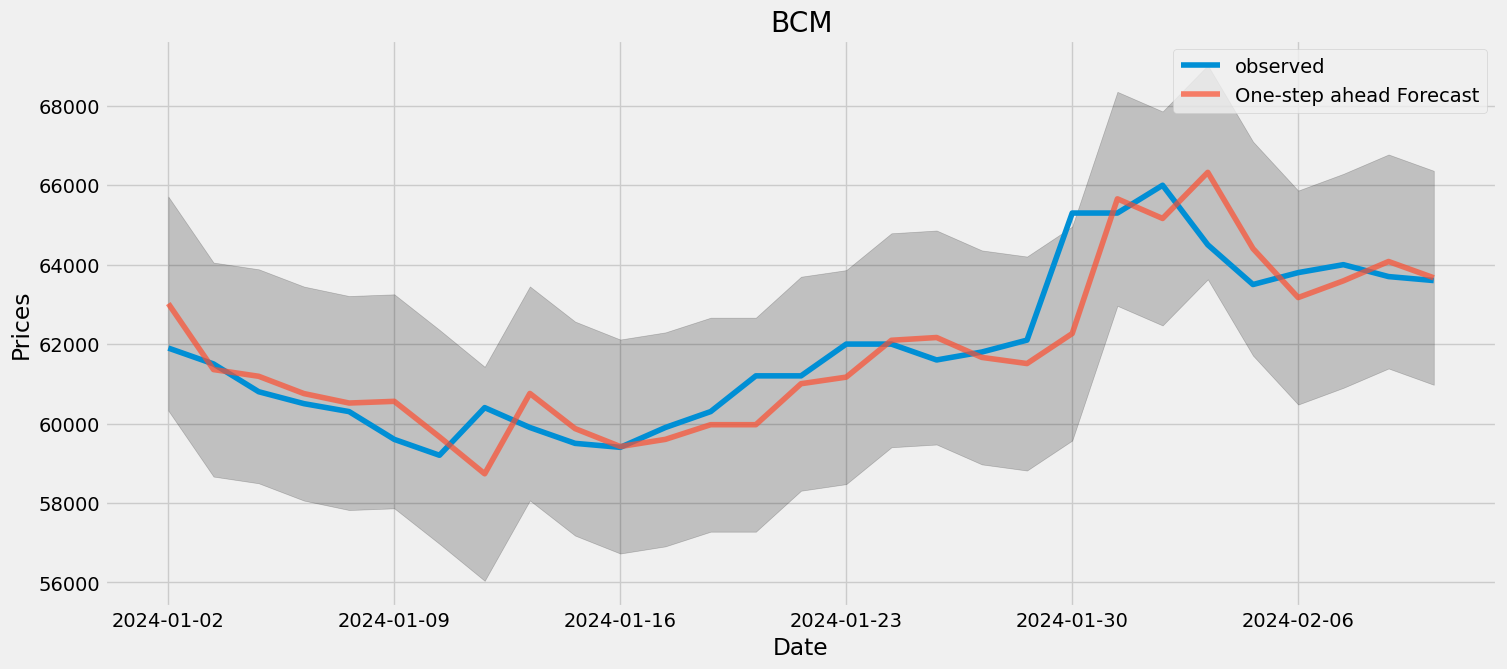

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20161D+00    |proj g|=  1.00681D-01

At iterate    5    f=  7.17450D+00    |proj g|=  3.69876D-02

At iterate   10    f=  7.17325D+00    |proj g|=  1.52556D-03

At iterate   15    f=  7.17199D+00    |proj g|=  3.18689D-02

At iterate   20    f=  7.16770D+00    |proj g|=  3.90501D-02

At iterate   25    f=  7.16583D+00    |proj g|=  2.94196D-02

At iterate   30    f=  7.13592D+00    |proj g|=  1.27986D-01

At iterate   35    f=  7.09722D+00    |proj g|=  1.89781D-01

At iterate   40    f=  7.08443D+00    |proj g|=  5.74886D-02

At iterate   45    f=  7.08402D+00    |proj g|=  9.91463D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.08371D+00    |proj g|=  6.90631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     86      1     0     0   6.906D-03   7.084D+00
  F =   7.0837126925998177     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8113      0.367      2.209      0.027       0.091       1.531
ma.L1         -1.2449      0.582     -2.138      0.033      -2.386      -0.104
ar.S.L12      -0.0033      0.026     -0.130  

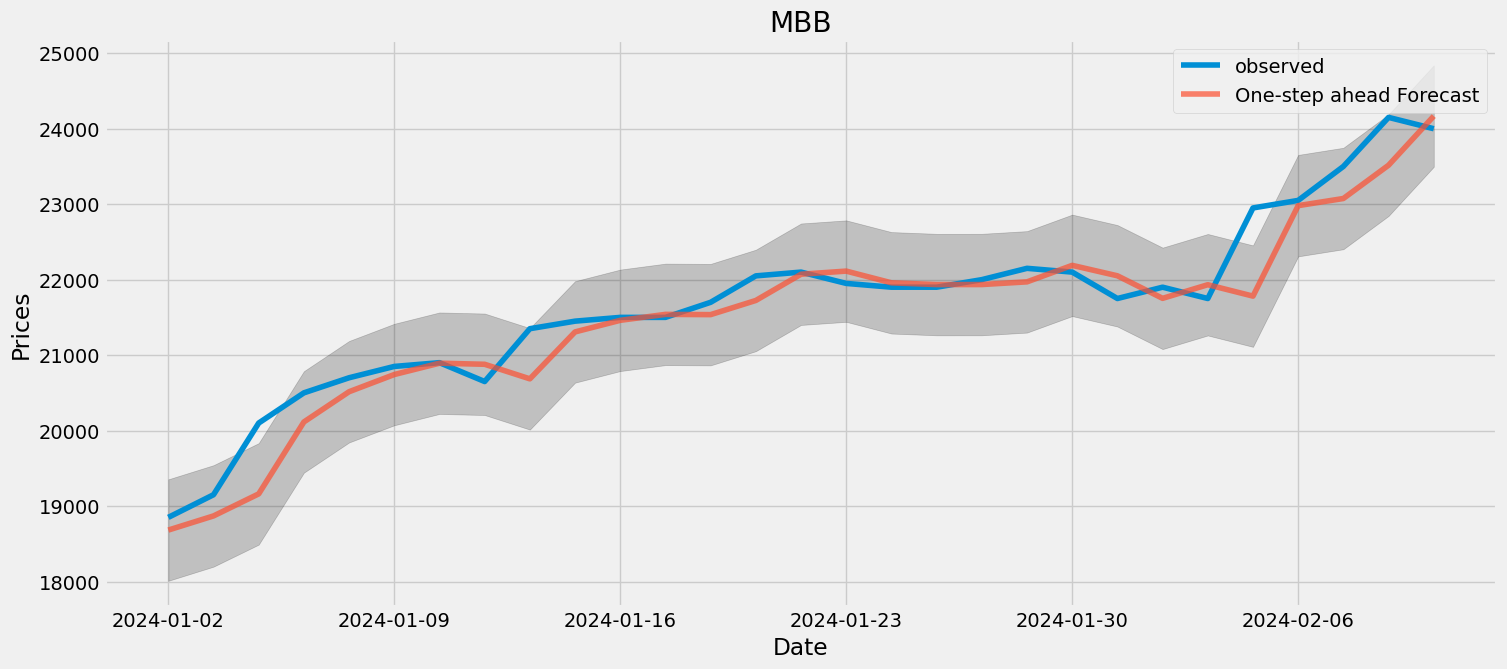

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77967D+00    |proj g|=  2.72446D-01

At iterate    5    f=  8.76278D+00    |proj g|=  1.57501D-02

At iterate   10    f=  8.76005D+00    |proj g|=  2.24170D-02

At iterate   15    f=  8.75947D+00    |proj g|=  2.35335D-04

At iterate   20    f=  8.75946D+00    |proj g|=  1.32957D-03

At iterate   25    f=  8.75917D+00    |proj g|=  1.59901D-02

At iterate   30    f=  8.73907D+00    |proj g|=  2.00077D-01

At iterate   35    f=  8.71421D+00    |proj g|=  1.12531D-02

At iterate   40    f=  8.71257D+00    |proj g|=  1.07652D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

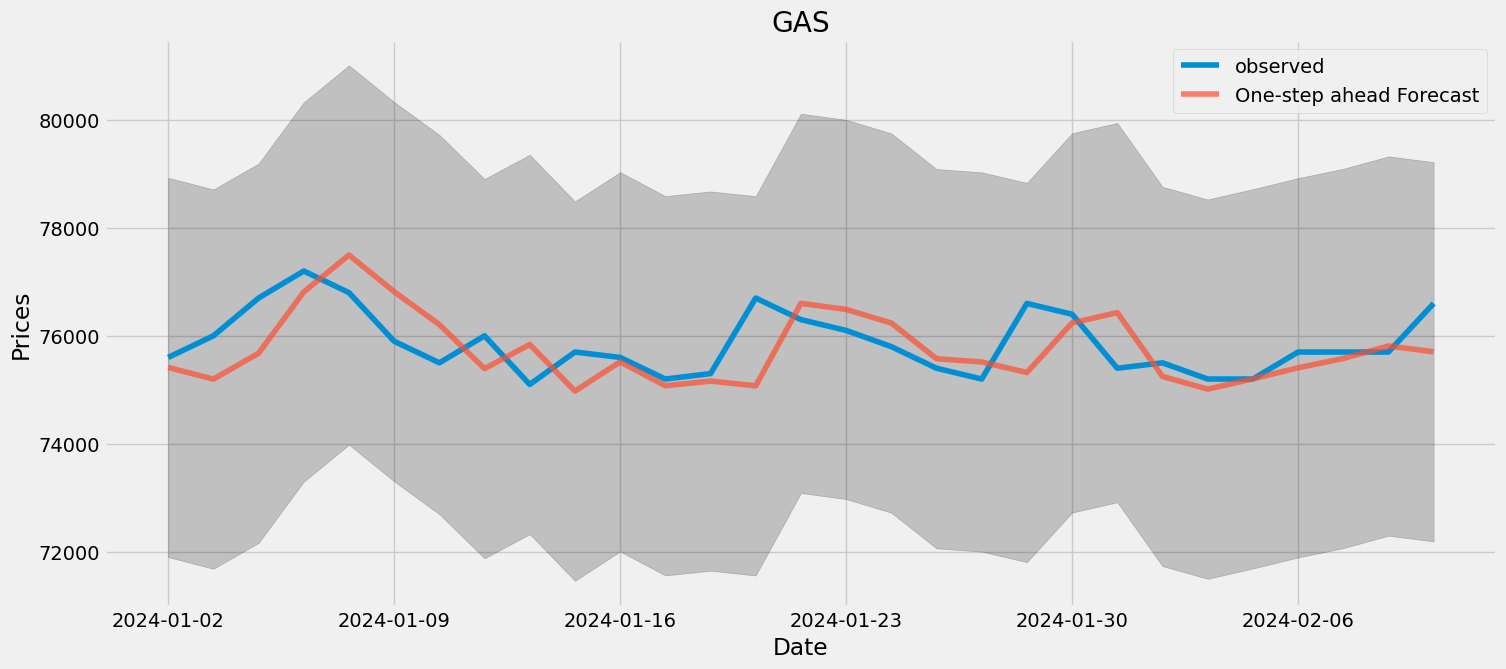

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39232D+00    |proj g|=  8.53465D-02

At iterate    5    f=  5.37080D+00    |proj g|=  3.98014D-02

At iterate   10    f=  5.36802D+00    |proj g|=  3.86742D-03

At iterate   15    f=  5.36705D+00    |proj g|=  1.13200D-02

At iterate   20    f=  5.36685D+00    |proj g|=  1.27357D-03

At iterate   25    f=  5.36656D+00    |proj g|=  2.92622D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.36368D+00    |proj g|=  1.74967D-03

At iterate   35    f=  5.36342D+00    |proj g|=  9.05962D-03

At iterate   40    f=  5.36257D+00    |proj g|=  2.09270D-03

At iterate   45    f=  5.36255D+00    |proj g|=  3.36787D-03


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.36098D+00    |proj g|=  4.11850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     82      2     0     0   4.118D-02   5.361D+00
  F =   5.3609814784293972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6149      0.425      1.447      0.148      -0.218       1.448
ma.L1         -0.6316      0.419     -1.506      0.132      -1.454       0.191
ar.S.L12      -0.0154      0.077     -0.201  

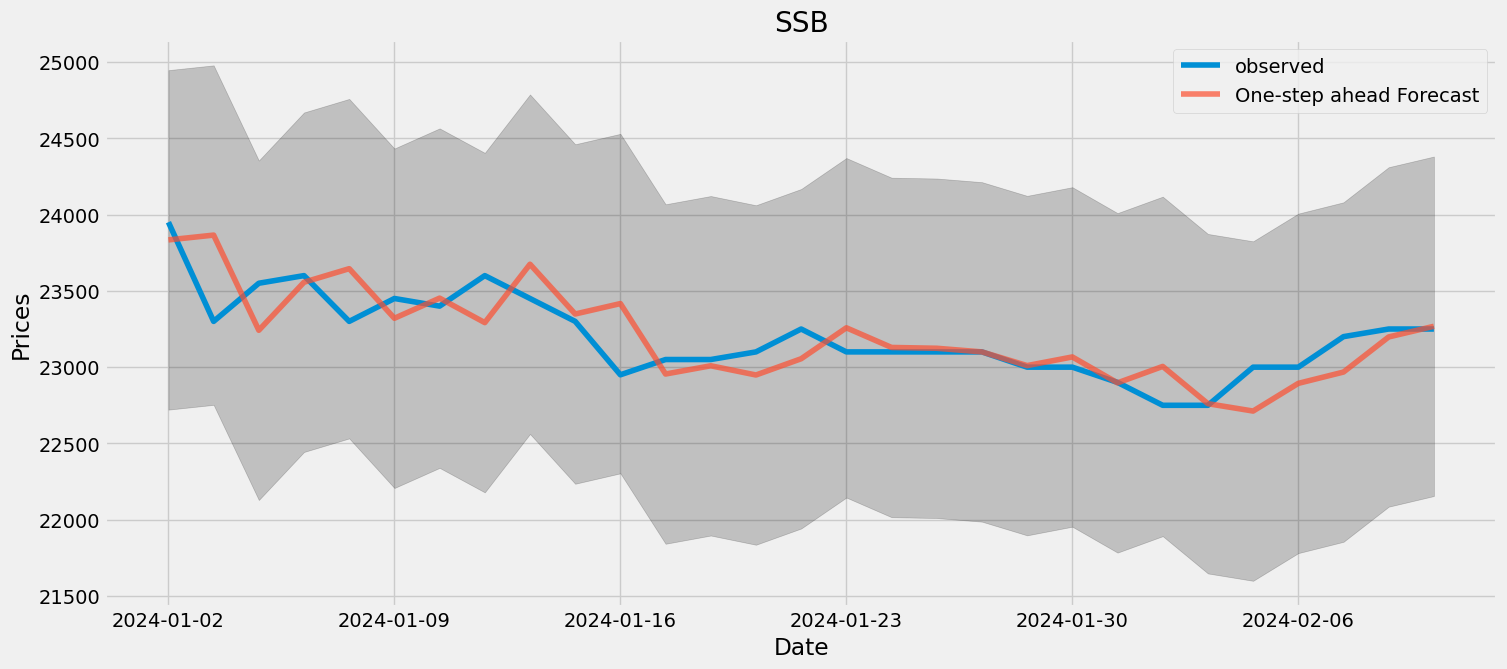

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12864D+00    |proj g|=  1.18065D-01

At iterate    5    f=  7.09340D+00    |proj g|=  6.04951D-02

At iterate   10    f=  7.08956D+00    |proj g|=  1.44435D-03

At iterate   15    f=  7.08927D+00    |proj g|=  1.39716D-02

At iterate   20    f=  7.08908D+00    |proj g|=  1.47000D-02

At iterate   25    f=  7.07590D+00    |proj g|=  1.76049D-01

At iterate   30    f=  7.05039D+00    |proj g|=  2.25648D-01

At iterate   35    f=  7.01742D+00    |proj g|=  5.53824D-03

At iterate   40    f=  7.01697D+00    |proj g|=  2.10670D-02

At iterate   45    f=  7.00668D+00    |proj g|=  2.10046D-02


/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.00632D+00    |proj g|=  2.78395D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77      1     0     0   2.784D-05   7.006D+00
  F =   7.0063184194650594     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0562      0.133      0.423      0.673      -0.204       0.317
ma.L1          0.1110      0.137      0.811      0.418      -0.157       0.379
ar.S.L12       0.0190      0.030      0.635  

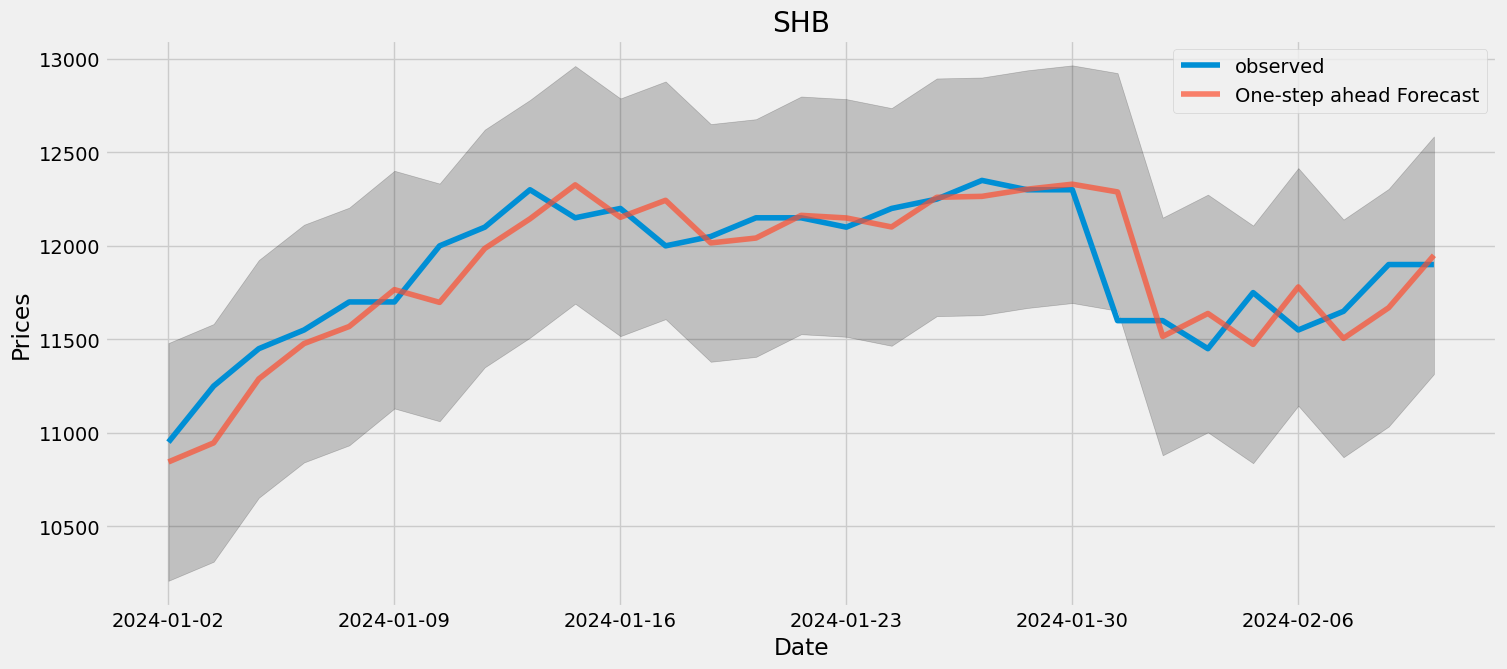

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91151D+00    |proj g|=  1.53352D-01


 This problem is unconstrained.



At iterate    5    f=  7.88915D+00    |proj g|=  5.73571D-03

At iterate   10    f=  7.88912D+00    |proj g|=  7.77682D-04

At iterate   15    f=  7.88898D+00    |proj g|=  4.26591D-03

At iterate   20    f=  7.88865D+00    |proj g|=  1.30398D-03

At iterate   25    f=  7.88844D+00    |proj g|=  2.47081D-02

At iterate   30    f=  7.88245D+00    |proj g|=  1.16268D-01

At iterate   35    f=  7.82051D+00    |proj g|=  1.14384D-01

At iterate   40    f=  7.80670D+00    |proj g|=  8.81346D-03

At iterate   45    f=  7.80663D+00    |proj g|=  2.94646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     60   

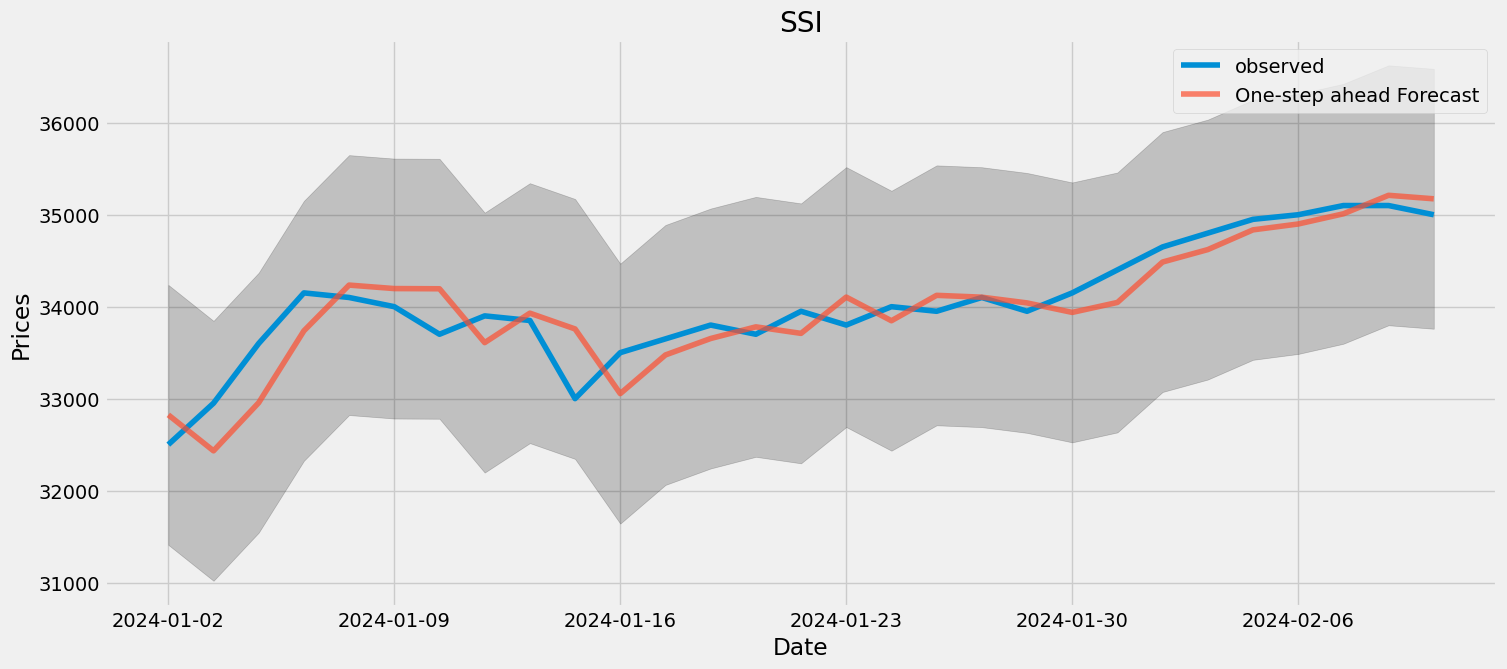

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75658D+00    |proj g|=  1.17538D-01

At iterate    5    f=  7.72586D+00    |proj g|=  1.13231D-02

At iterate   10    f=  7.72569D+00    |proj g|=  3.50013D-03

At iterate   15    f=  7.72547D+00    |proj g|=  4.33046D-03

At iterate   20    f=  7.72496D+00    |proj g|=  1.40378D-02

At iterate   25    f=  7.69631D+00    |proj g|=  2.09909D-01

At iterate   30    f=  7.64000D+00    |proj g|=  9.97649D-03

At iterate   35    f=  7.63856D+00    |proj g|=  1.12955D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

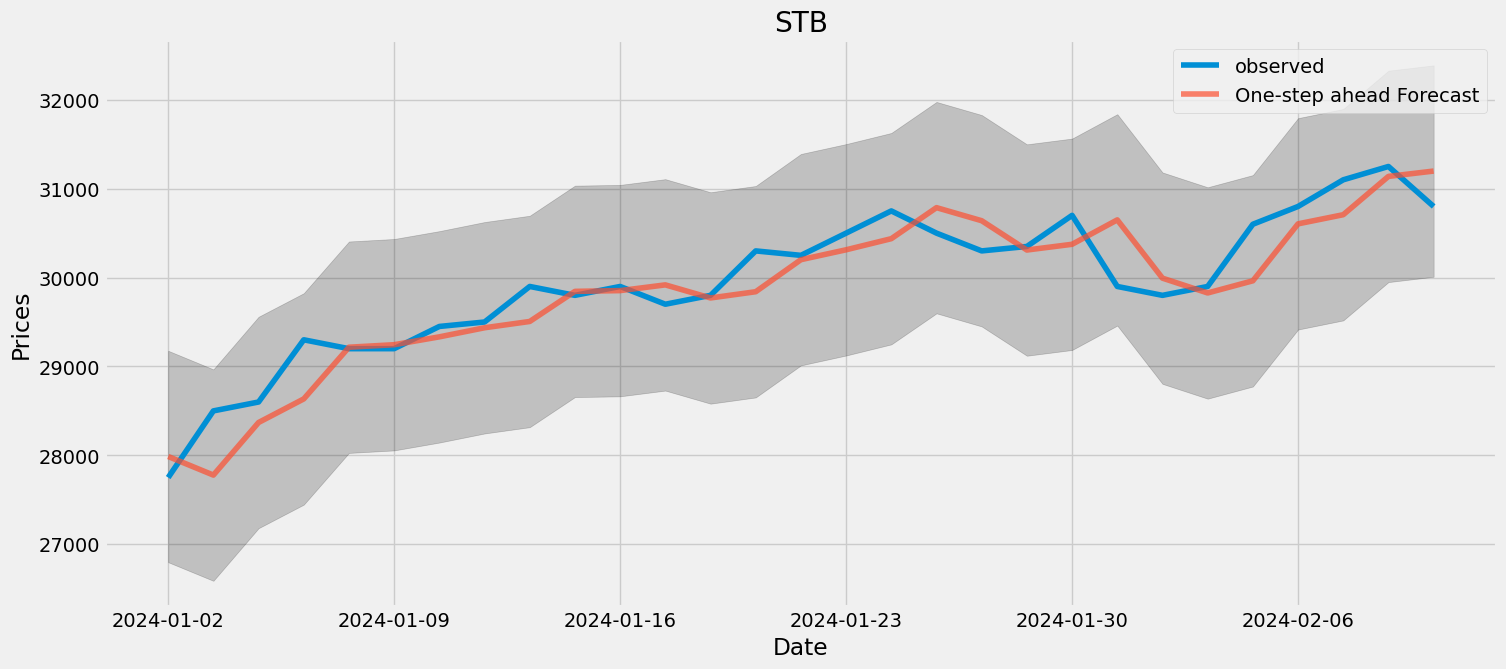

/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nvkhoa14/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32826D+00    |proj g|=  1.31603D-01

At iterate    5    f=  7.29667D+00    |proj g|=  3.53868D-02

At iterate   10    f=  7.29494D+00    |proj g|=  1.74394D-03

At iterate   15    f=  7.29452D+00    |proj g|=  5.76070D-03

At iterate   20    f=  7.29383D+00    |proj g|=  1.90726D-03

At iterate   25    f=  7.29358D+00    |proj g|=  5.60698D-03

At iterate   30    f=  7.28680D+00    |proj g|=  7.35214D-02

At iterate   35    f=  7.19659D+00    |proj g|=  1.18607D-01

At iterate   40    f=  7.19208D+00    |proj g|=  1.12704D-02

At iterate   45    f=  7.19190D+00    |proj g|=  5.71958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

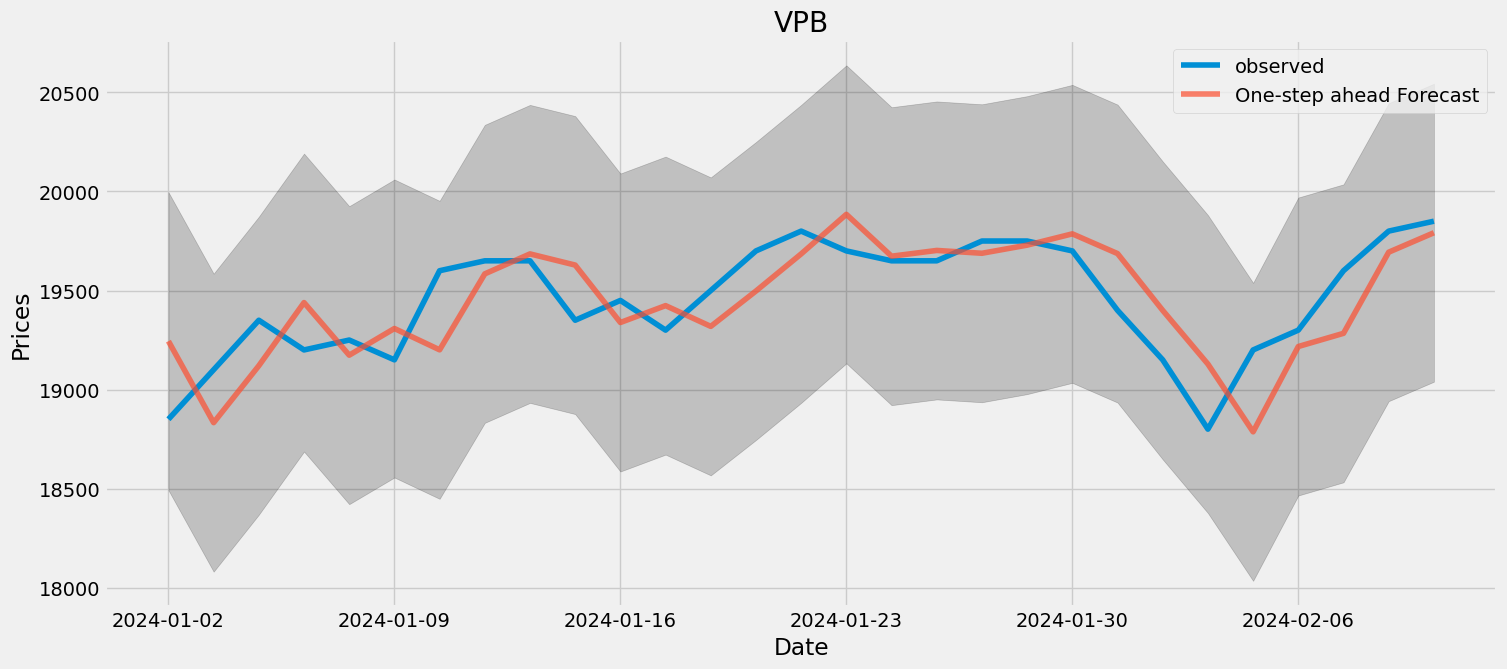

In [5]:
for stock in df.columns:
    results = one_day(stock)

    pred = results.get_prediction(start='2024-01-02', dynamic=False)
    pred_ci = pred.conf_int()

    ax = df[stock]['2024':].plot(label='observed', figsize=(16,7))
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.legend()
    plt.show()

    

In [11]:
y_forecasted = pred.predicted_mean
y_truth = df['ACB']['2024':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 184724.42


In [12]:
mod = sm.tsa.statespace.SARIMAX(df.ACB[:'2024-01-02'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24289D+00    |proj g|=  1.22209D-01

At iterate    5    f=  7.21629D+00    |proj g|=  4.06060D-02

At iterate   10    f=  7.21436D+00    |proj g|=  9.70542D-04

At iterate   15    f=  7.21387D+00    |proj g|=  1.72678D-02

At iterate   20    f=  7.21003D+00    |proj g|=  3.91930D-02

At iterate   25    f=  7.20942D+00    |proj g|=  2.25265D-03

At iterate   30    f=  7.20687D+00    |proj g|=  3.29016D-02

At iterate   35    f=  7.18394D+00    |proj g|=  1.20684D-01

At iterate   40    f=  7.11371D+00    |proj g|=  7.57533D-02

At iterate   45    f=  7.11121D+00    |proj g|=  9.22306D-04

At iterate   50    f=  7.11121D+00    |proj g|=  1.28662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [13]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=14)

# Get confidence intervals of forecasts
pred_uci = pred_uc.conf_int()

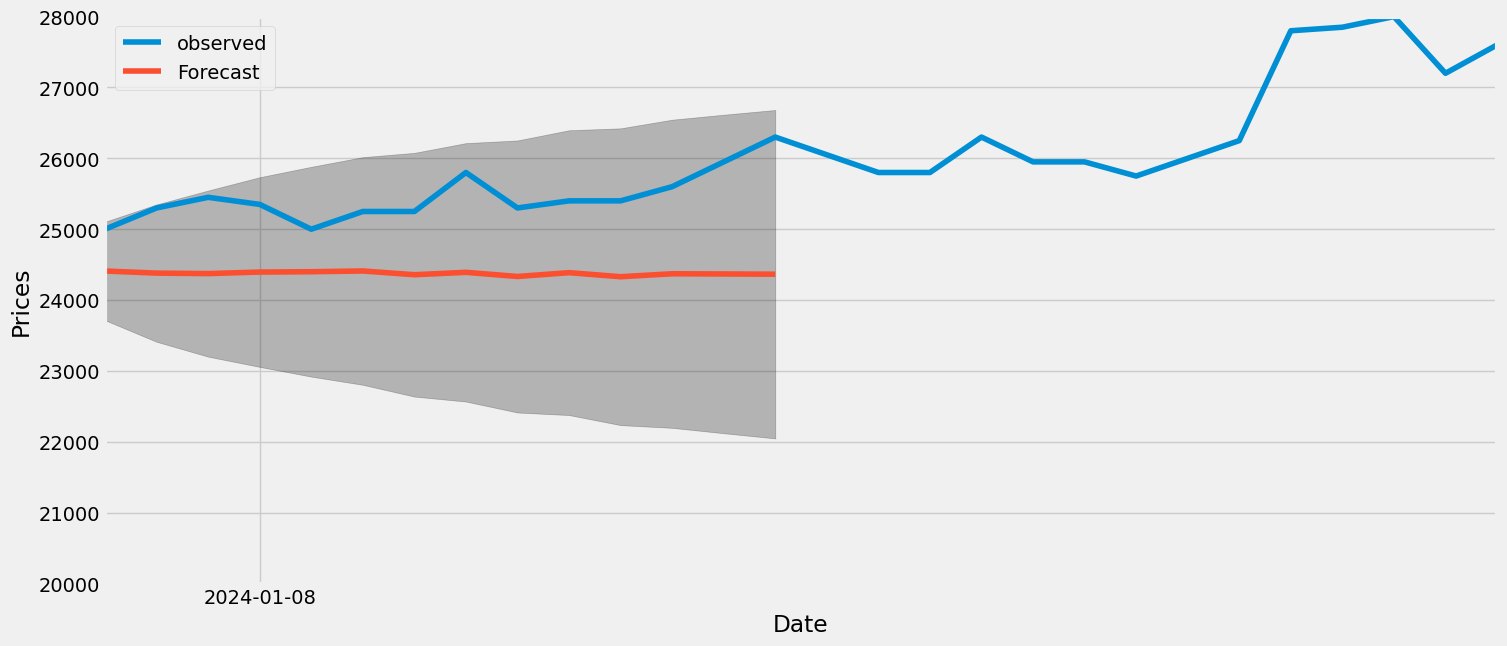

In [14]:
ax = df['ACB'].plot(label='observed', figsize=(16, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_uci.index,
                pred_uci.iloc[:, 0],
                pred_uci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.xlim(997, 1024)
plt.ylim(20000, 28000)
plt.legend()
plt.show()